# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:** 

1- Matheus Mendes Neves(RA:22000917)

2- Jheferson Warley de Oliveira Santos (RA:52400071)

3- Gabriel Vaz da Costa Xavier (RA: 52400192)

4- João Pedro Antônio dos Santos Castro (RA:52400204)


## Qualidade de vinhos. 

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição 

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é 
antimicróbico e antioxidante 

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [78]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import display, Markdown
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("wines_pre_processing.csv")
df_treated = pd.read_csv("wines.csv")


grafico_tamanho = (16, 6)

### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate. 

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [ ]:
# ==============================================================
# Dicionário para definir o número de casas decimais na exibição dos valores
# ==============================================================
decimal_places = {
    "fixed acidity": 1,
    "volatile acidity": 2,
    "citric acid": 2,
    "residual sugar": 2,
    "chlorides": 4,
    "free sulfur dioxide": 1,
    "total sulfur dioxide": 1,
    "density": 4,
    "pH": 2,
    "sulphates": 2,
    "alcohol": 1,
    "quality": 0,
}

# ==============================================================
# Validação e Conversão da Coluna "color"
# ==============================================================
print("\n==============================================================")
print("🔍 Processando coluna: color")
print("==============================================================")

# Exibir valores antes do tratamento
print("📌 Valores únicos ANTES do tratamento:")
print(df["color"].unique())

# Contar valores faltantes antes do tratamento
missing_colors_before = df["color"].isna().sum()
print(f"❌ Valores faltantes ANTES do tratamento: {missing_colors_before}")

# Identificar valores inconsistentes antes da conversão
inconsistent_colors = df[~df["color"].isin(["red", "white"])]["color"].dropna()
if not inconsistent_colors.empty:
    print("⚠️ Valores inconsistentes encontrados:")
    print(inconsistent_colors.unique())

# Tratar valores inconsistentes
df["color"] = df["color"].where(df["color"].isin(["red", "white"]), None)

# Definir o método de preenchimento
method_used = "Moda (valor mais frequente)"
fill_value = df["color"].mode()[0]

# Preencher valores faltantes
df["color"].fillna(fill_value, inplace=True)

# Contar valores faltantes depois do tratamento
missing_colors_after = df["color"].isna().sum()

# Exibir valores depois do tratamento
print("\n📌 Valores únicos DEPOIS do tratamento:")
print(df["color"].unique())
print(f"✔️ Valores faltantes DEPOIS do tratamento: {missing_colors_after}")
print(f"📊 Método de preenchimento usado: {method_used}")
print("==============================================================")

# ==============================================================
# Processamento geral das colunas numéricas
# ==============================================================
for col, decimals in decimal_places.items():
    print("\n==============================================================")
    print(f"🔍 Processando coluna: {col}")
    print("==============================================================")

    # Exibir valores antes do tratamento
    print("📌 Valores únicos ANTES do tratamento:")
    print(df[col].unique())

    # Contar valores faltantes antes do tratamento
    missing_values_before = df[col].isna().sum()
    print(f"❌ Valores faltantes ANTES do tratamento: {missing_values_before}")

    # Identificar valores inconsistentes antes da conversão
    inconsistent_values = df[~df[col].astype(str).str.replace('.', '', 1).str.isnumeric()][col].dropna()
    if not inconsistent_values.empty:
        print(f"⚠️ Valores inconsistentes encontrados:")
        print(inconsistent_values.unique())

    # Converter para numérico
    df[col] = pd.to_numeric(df[col], errors="coerce")  

    # Contar valores faltantes depois da conversão
    missing_values_after_conversion = df[col].isna().sum()

    # Definir o método de preenchimento baseado no tipo da variável
    if df[col].nunique() == 2:  
        fill_value = df[col].mode()[0] 
        method_used = "Moda (valor mais frequente)"
    elif df[col].skew() > 1:  
        fill_value = df[col].median()  
        method_used = "Mediana"
    else:  
        fill_value = df[col].mean() 
        method_used = "Média"

    # Preencher valores NaN
    df[col].fillna(fill_value, inplace=True)

    # Contar valores faltantes depois do preenchimento
    missing_values_after_fill = df[col].isna().sum()

    # Exibir valores depois do tratamento
    print("\n📌 Valores únicos DEPOIS do tratamento:")
    print([f"{x:.{decimals}f}" for x in df[col].unique()])
    print(f"✔️ Valores faltantes DEPOIS do tratamento: {missing_values_after_fill}")
    print(f"📊 Método de preenchimento usado: {method_used}")
    print("==============================================================")


explanation = """
# Explicação do Tratamento de Dados

## 1. Dicionário `decimal_places`
- **Objetivo:** Define o número de casas decimais para exibir os valores de cada coluna numérica após o tratamento.
- **Lógica:** Cada coluna tem uma precisão específica baseada em sua natureza (ex.: `density` com 4 casas decimais para maior detalhe, `quality` com 0 por ser geralmente inteira).
- **Exemplo:** Para `fixed acidity`, os valores são exibidos com 1 casa decimal (ex.: 7.4).

## 2. Tratamento da Coluna `color` (Categórica)
- **Passos:**
  1. **Exibição Inicial:** Mostra os valores únicos e a quantidade de valores faltantes antes do tratamento.
  2. **Identificação de Inconsistências:** Verifica se há valores fora do esperado (`"red"` ou `"white"`). Valores como `"blue"` são considerados inconsistentes.
  3. **Correção:** Substitui valores inconsistentes por `None` usando `where`.
  4. **Preenchimento:** Usa a **moda** (valor mais frequente) para preencher valores faltantes ou inconsistentes, garantindo que a coluna seja categórica válida.
  5. **Validação Final:** Exibe os valores únicos e verifica se ainda há faltantes após o tratamento.
- **Lógica:** Como `color` é uma variável categórica com poucas categorias esperadas, a moda é uma escolha robusta para preenchimento, preservando a distribuição original.

## 3. Processamento das Colunas Numéricas
- **Passos (para cada coluna em `decimal_places`):**
  1. **Exibição Inicial:** Mostra valores únicos e faltantes antes do tratamento.
  2. **Identificação de Inconsistências:** Usa uma verificação (`str.isnumeric()`) para encontrar valores não numéricos (ex.: `"abc"`).
  3. **Conversão:** Transforma a coluna em numérica com `pd.to_numeric(..., errors='coerce')`, convertendo inconsistências em `NaN`.
  4. **Escolha do Método de Preenchimento:**
     - **Se binária (2 valores únicos):** Usa a **moda**, pois é uma variável categórica disfarçada de numérica (ex.: 0 e 1).
     - **Se assimétrica (`skew() > 1`):** Usa a **mediana**, mais robusta a outliers em distribuições enviesadas.
     - **Caso geral:** Usa a **média**, adequada para distribuições simétricas sem outliers significativos.
  5. **Preenchimento:** Substitui `NaN` pelo valor calculado.
  6. **Validação Final:** Exibe os valores únicos formatados com o número de casas decimais definido e verifica faltantes.
- **Lógica:** 
  - A conversão para numérico é essencial para análises posteriores (ex.: regressão).
  - O método de preenchimento é adaptado ao tipo de distribuição:
    - **Moda** para variáveis binárias preserva a categoria dominante.
    - **Mediana** é escolhida para distribuições assimétricas, evitando influência de valores extremos.
    - **Média** é usada em distribuições simétricas, refletindo o centro típico dos dados.

## Resumo da Estratégia
- **Flexibilidade:** O código adapta o preenchimento ao tipo de dado (categórico ou numérico) e à distribuição (binária, assimétrica, simétrica).
- **Robustez:** Trata inconsistências e valores faltantes de forma sistemática, exibindo cada etapa para auditoria.
- **Precisão:** Controla a formatação dos valores para refletir a natureza de cada variável.

"""

display(Markdown(explanation))


🔍 Processando coluna: color
📌 Valores únicos ANTES do tratamento:
['white' 'red' 'dois' 'leonidas, para te arrumar essas "confusão"' 'amo'
 'vinho ruim' nan 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']
❌ Valores faltantes ANTES do tratamento: 3
⚠️ Valores inconsistentes encontrados:
['dois' 'leonidas, para te arrumar essas "confusão"' 'amo' 'vinho ruim'
 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']

📌 Valores únicos DEPOIS do tratamento:
['white' 'red']
✔️ Valores faltantes DEPOIS do tratamento: 0
📊 Método de preenchimento usado: Moda (valor mais frequente)

🔍 Processando coluna: fixed acidity
📌 Valores únicos ANTES do tratamento:
['6.6' '6.9' '6.7' '7.1' '8.3' '8.0' '6.0' '11.9' '6.8' '7.7' '11.5' '7.3'
 '6.4' '7.6' '5.8' '10.2' '5.1' '7.5' '7.9' '10.4' '6.1' '5.6' '10.0'
 '7.2' '12.5' '8.4' '5.9' '8.5' '10.6' '7.8' '5.4' '6.5' '6.3' '14.3'
 '8.7' '5.7' '5.3' '7.0' '9.0' '8.8' '6.2' '12.3' '7.4' '8.2' '8.1' '9.8'
 '8.6' '10.3' '9.6' '9.3' '8.9' '5.2' '15.5' '9


# Explicação do Tratamento de Dados

## 1. Dicionário `decimal_places`
- **Objetivo:** Define o número de casas decimais para exibir os valores de cada coluna numérica após o tratamento.
- **Lógica:** Cada coluna tem uma precisão específica baseada em sua natureza (ex.: `density` com 4 casas decimais para maior detalhe, `quality` com 0 por ser geralmente inteira).
- **Exemplo:** Para `fixed acidity`, os valores são exibidos com 1 casa decimal (ex.: 7.4).

## 2. Tratamento da Coluna `color` (Categórica)
- **Passos:**
  1. **Exibição Inicial:** Mostra os valores únicos e a quantidade de valores faltantes antes do tratamento.
  2. **Identificação de Inconsistências:** Verifica se há valores fora do esperado (`"red"` ou `"white"`). Valores como `"blue"` são considerados inconsistentes.
  3. **Correção:** Substitui valores inconsistentes por `None` usando `where`.
  4. **Preenchimento:** Usa a **moda** (valor mais frequente) para preencher valores faltantes ou inconsistentes, garantindo que a coluna seja categórica válida.
  5. **Validação Final:** Exibe os valores únicos e verifica se ainda há faltantes após o tratamento.
- **Lógica:** Como `color` é uma variável categórica com poucas categorias esperadas, a moda é uma escolha robusta para preenchimento, preservando a distribuição original.

## 3. Processamento das Colunas Numéricas
- **Passos (para cada coluna em `decimal_places`):**
  1. **Exibição Inicial:** Mostra valores únicos e faltantes antes do tratamento.
  2. **Identificação de Inconsistências:** Usa uma verificação (`str.isnumeric()`) para encontrar valores não numéricos (ex.: `"abc"`).
  3. **Conversão:** Transforma a coluna em numérica com `pd.to_numeric(..., errors='coerce')`, convertendo inconsistências em `NaN`.
  4. **Escolha do Método de Preenchimento:**
     - **Se binária (2 valores únicos):** Usa a **moda**, pois é uma variável categórica disfarçada de numérica (ex.: 0 e 1).
     - **Se assimétrica (`skew() > 1`):** Usa a **mediana**, mais robusta a outliers em distribuições enviesadas.
     - **Caso geral:** Usa a **média**, adequada para distribuições simétricas sem outliers significativos.
  5. **Preenchimento:** Substitui `NaN` pelo valor calculado.
  6. **Validação Final:** Exibe os valores únicos formatados com o número de casas decimais definido e verifica faltantes.
- **Lógica:** 
  - A conversão para numérico é essencial para análises posteriores (ex.: regressão).
  - O método de preenchimento é adaptado ao tipo de distribuição:
    - **Moda** para variáveis binárias preserva a categoria dominante.
    - **Mediana** é escolhida para distribuições assimétricas, evitando influência de valores extremos.
    - **Média** é usada em distribuições simétricas, refletindo o centro típico dos dados.

## Resumo da Estratégia
- **Flexibilidade:** O código adapta o preenchimento ao tipo de dado (categórico ou numérico) e à distribuição (binária, assimétrica, simétrica).
- **Robustez:** Trata inconsistências e valores faltantes de forma sistemática, exibindo cada etapa para auditoria.
- **Precisão:** Controla a formatação dos valores para refletir a natureza de cada variável.



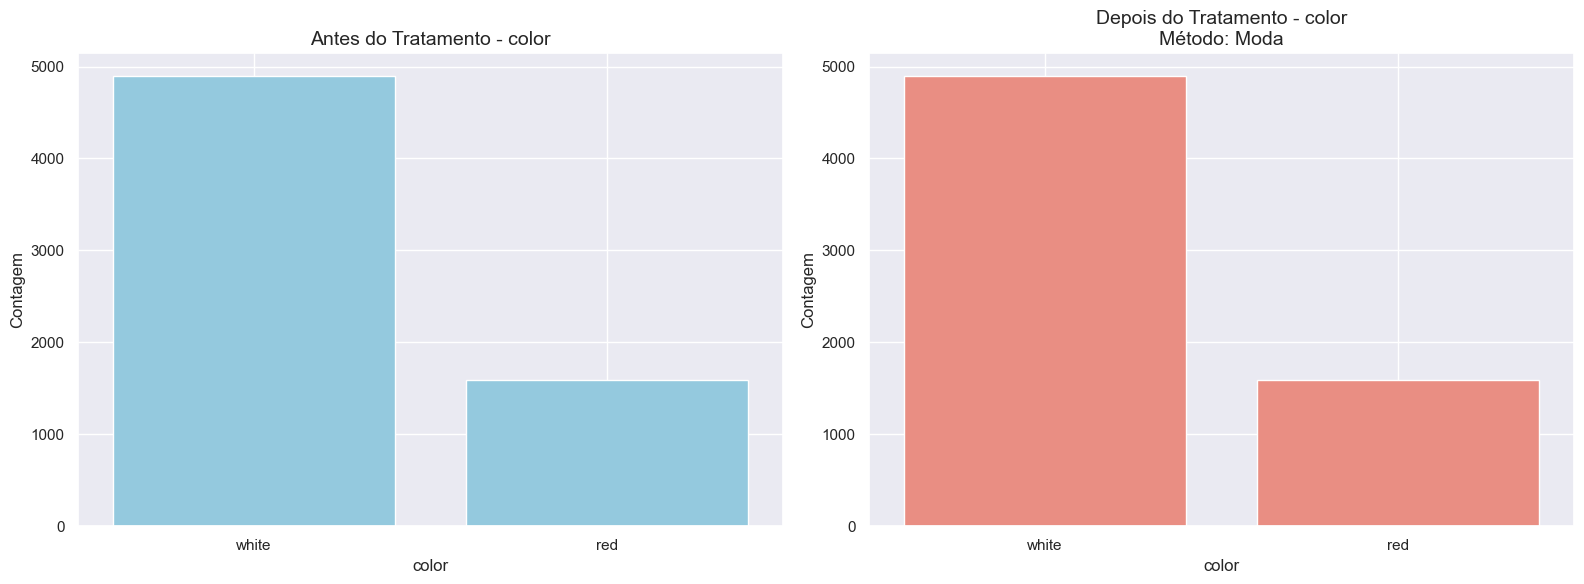

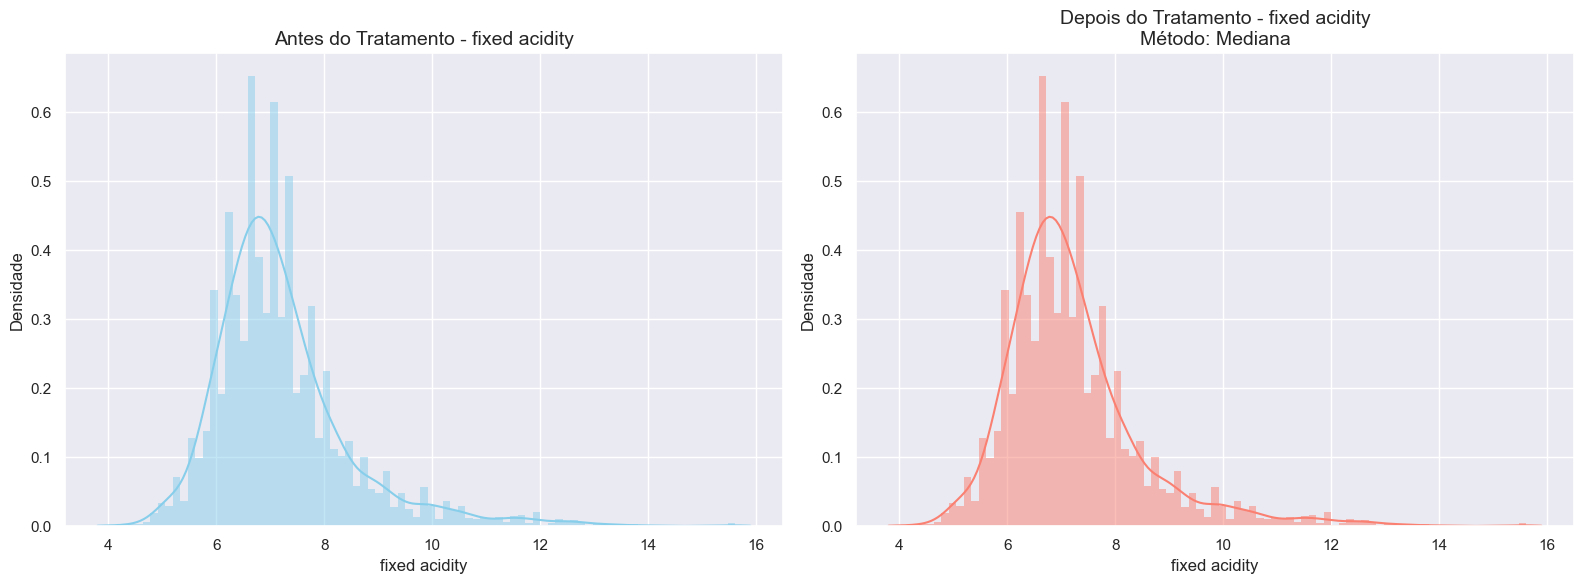

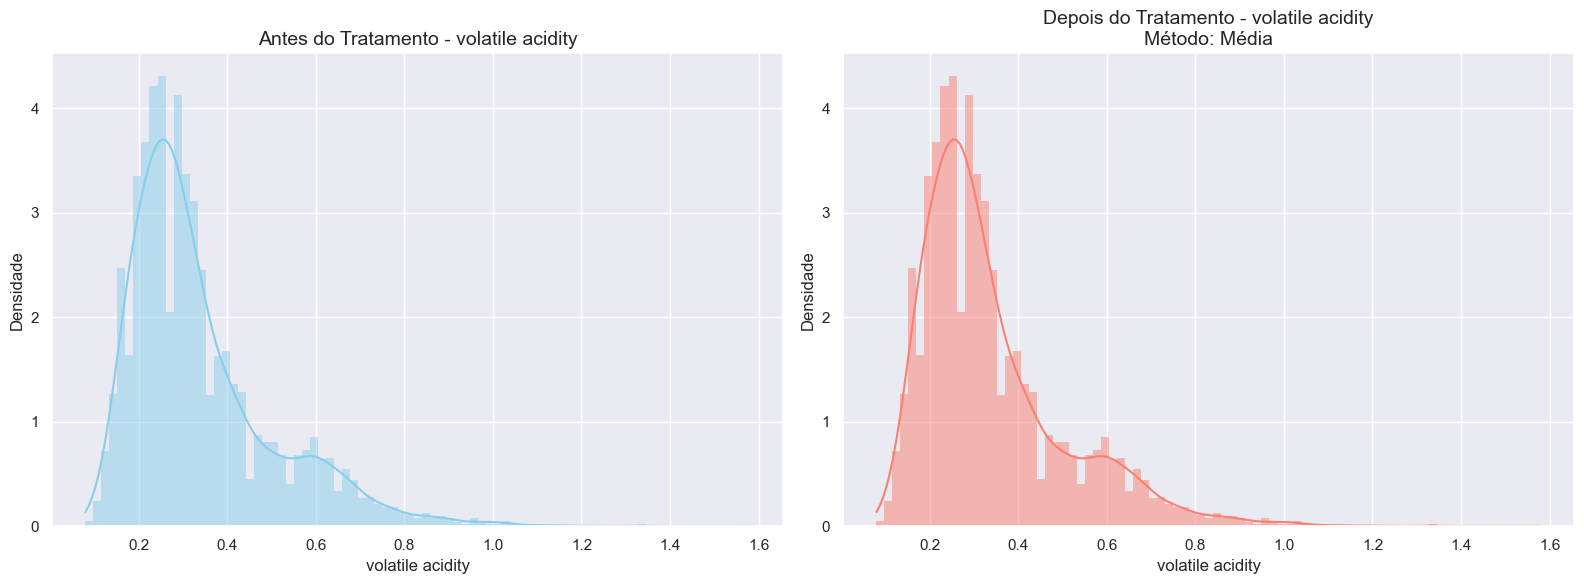

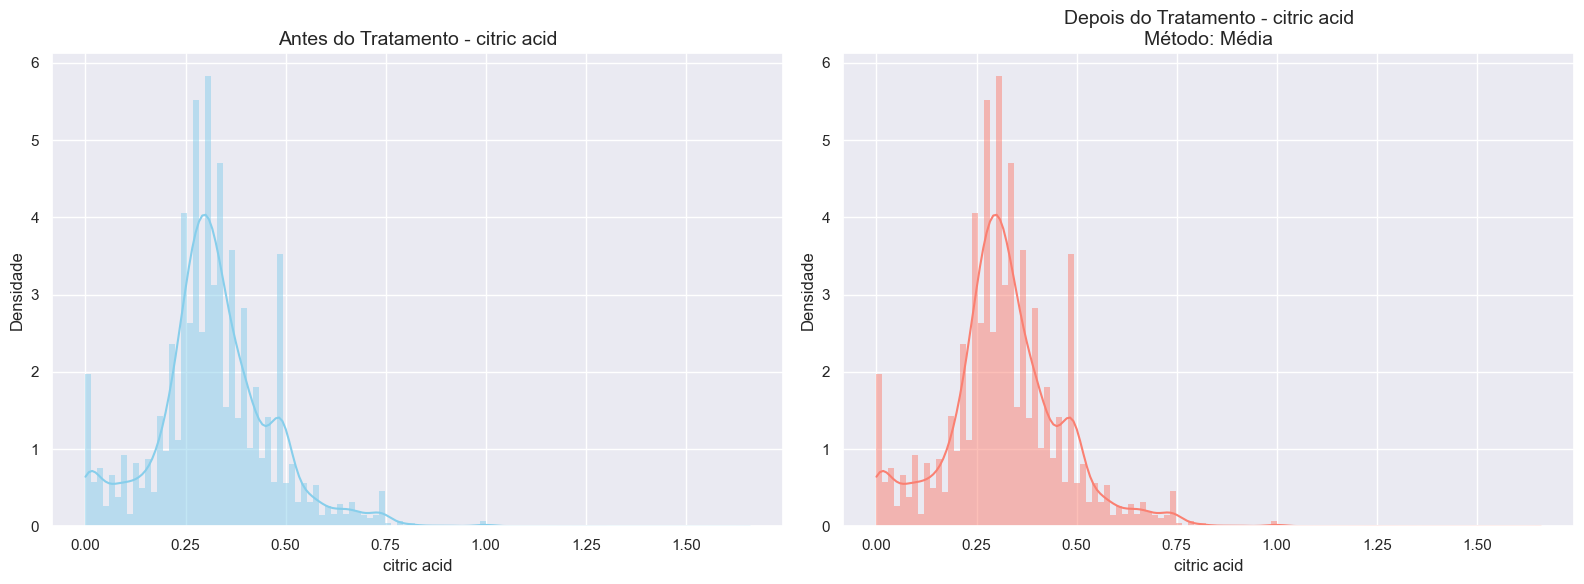

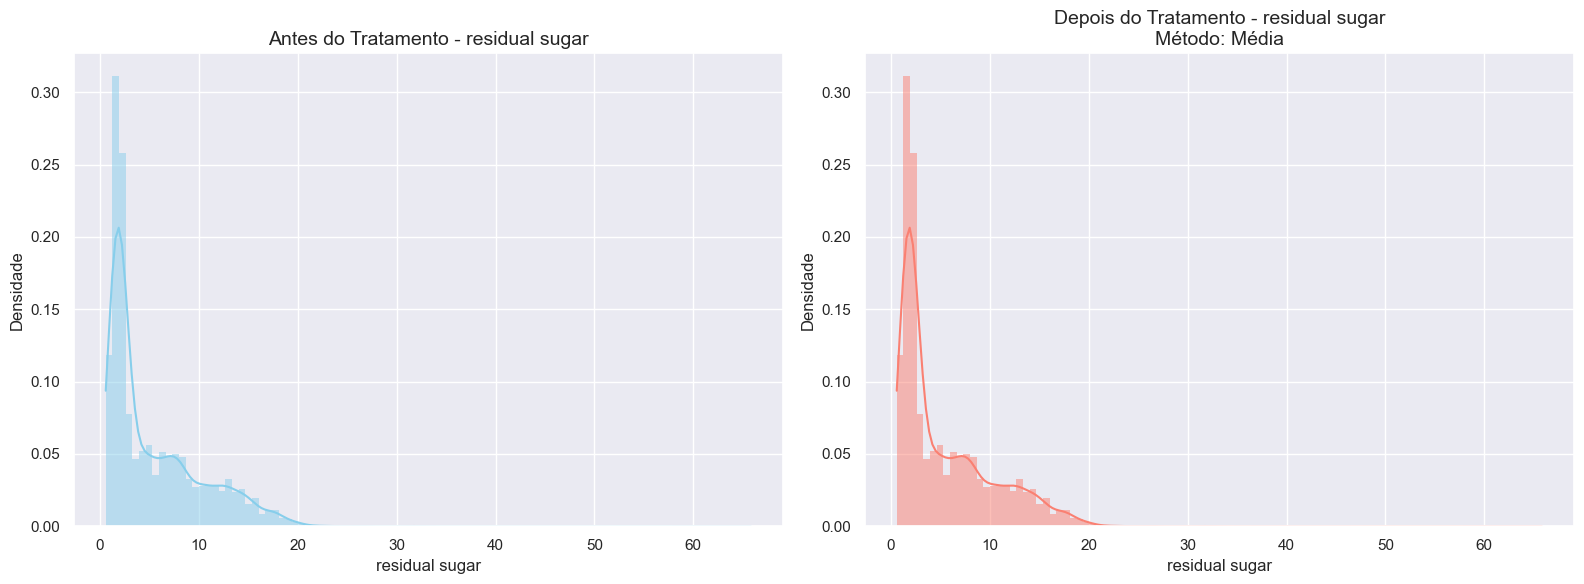

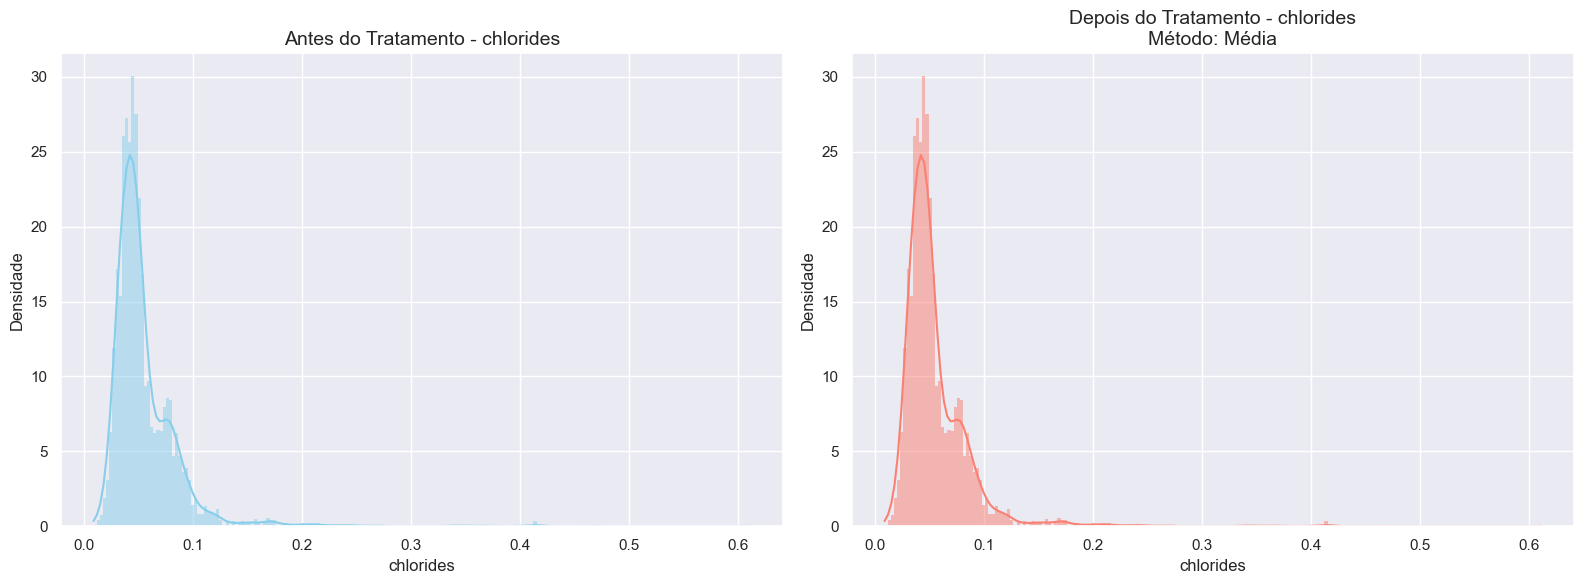

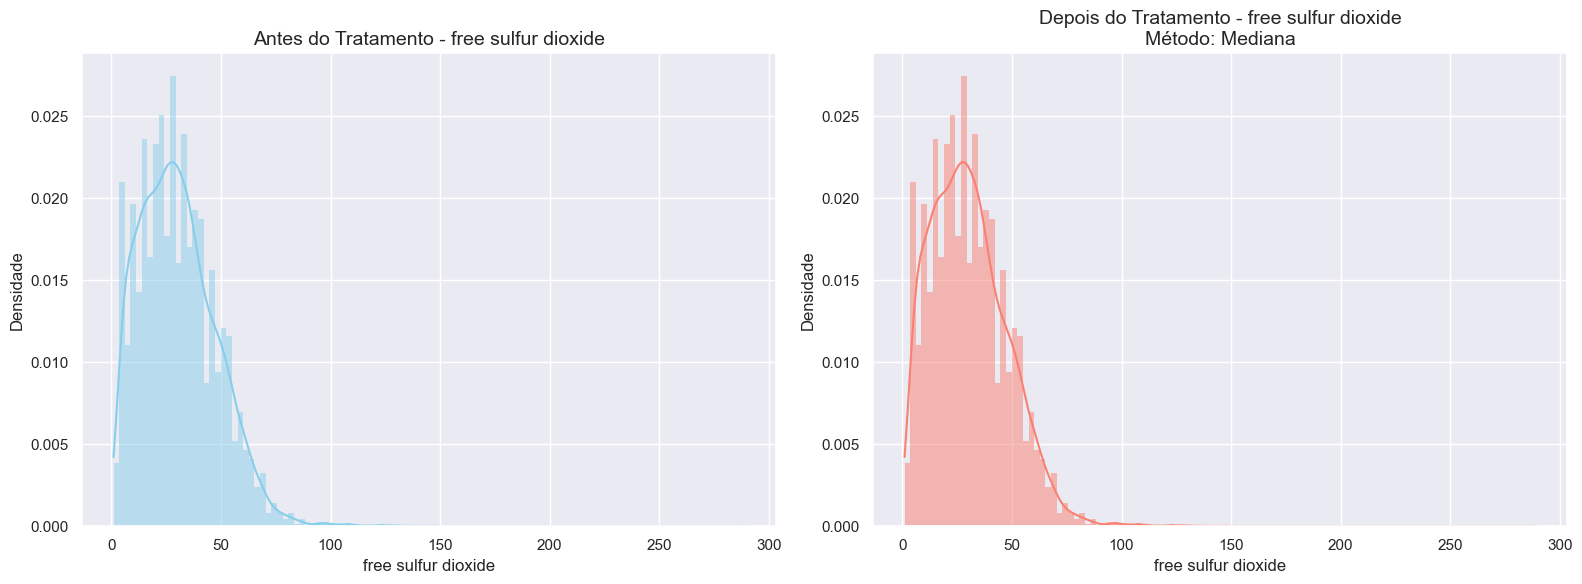

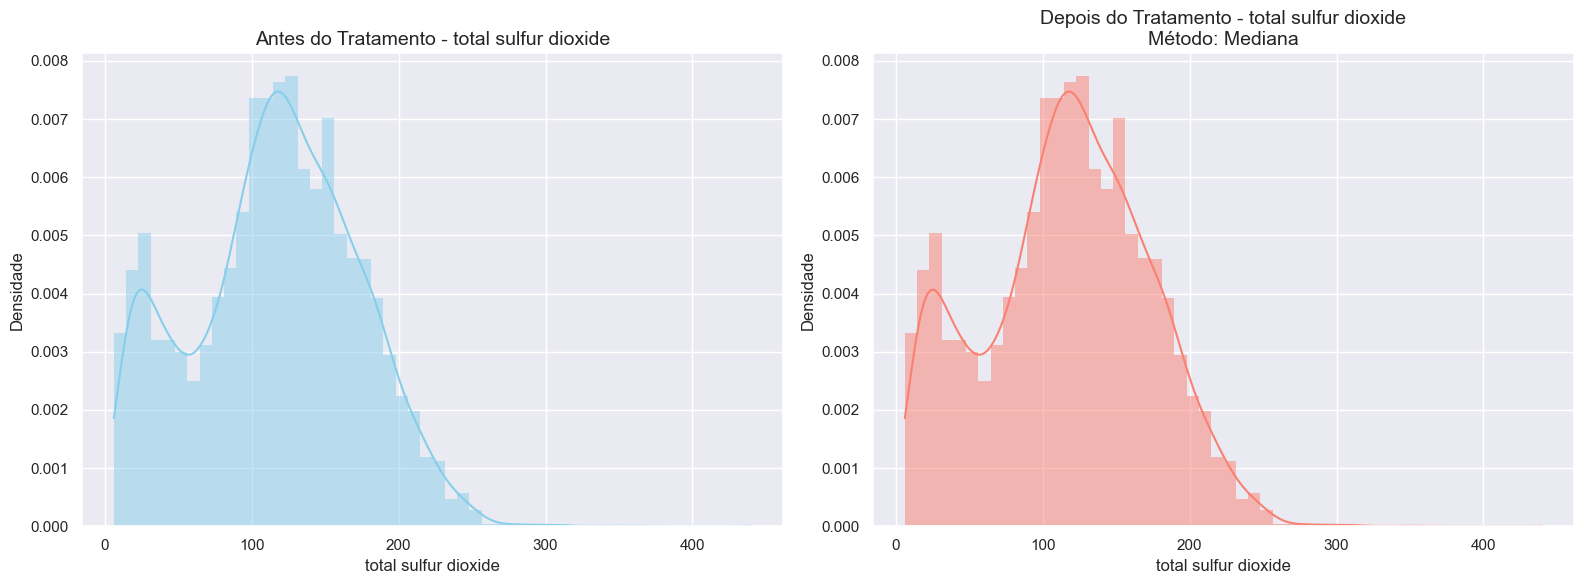

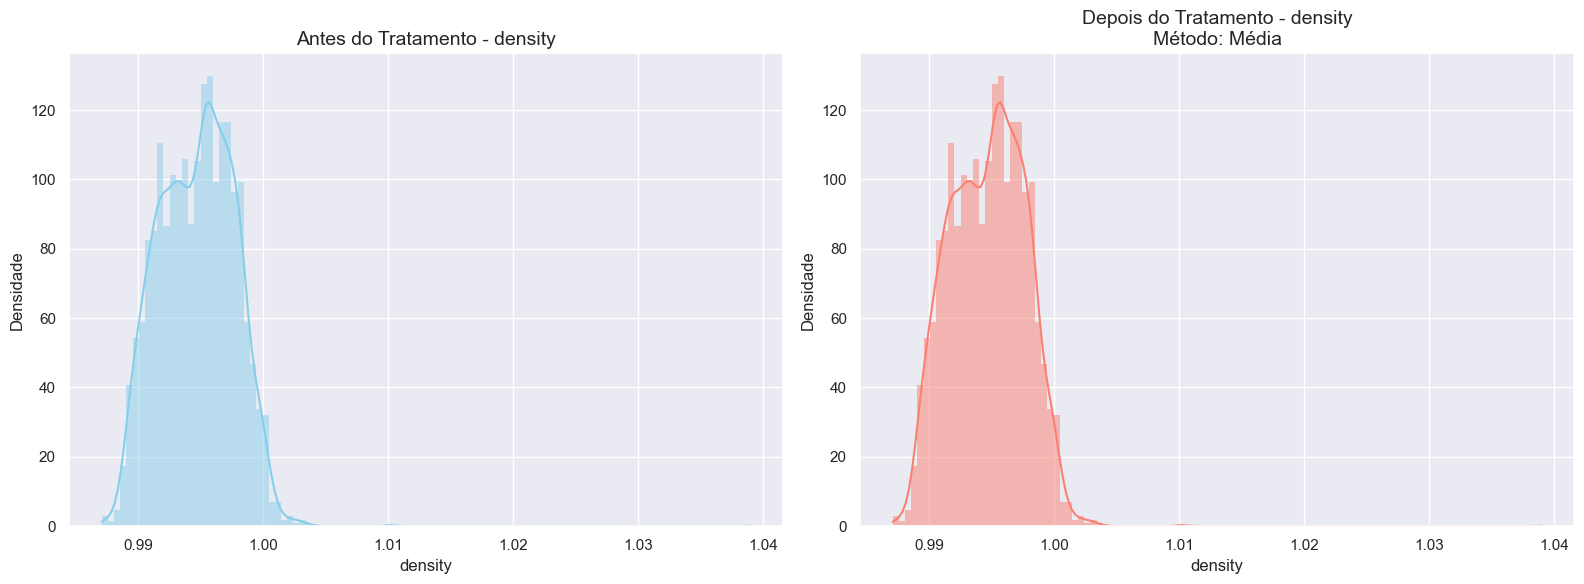

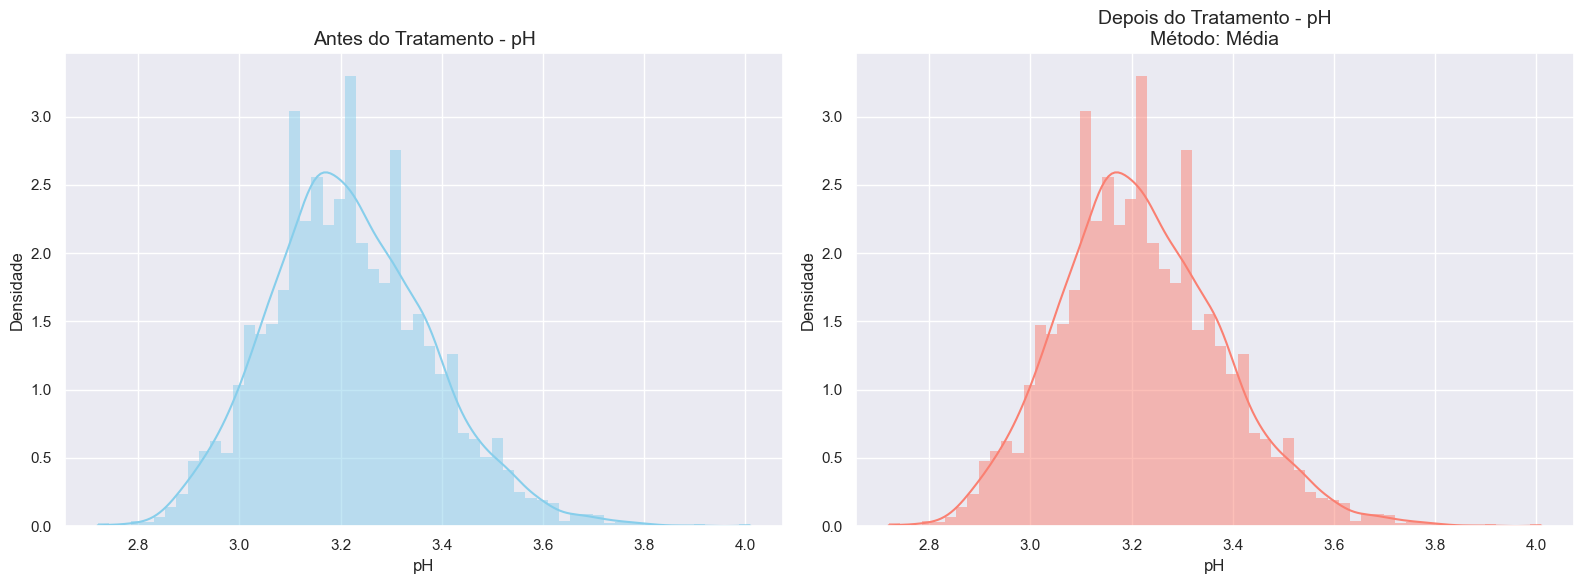

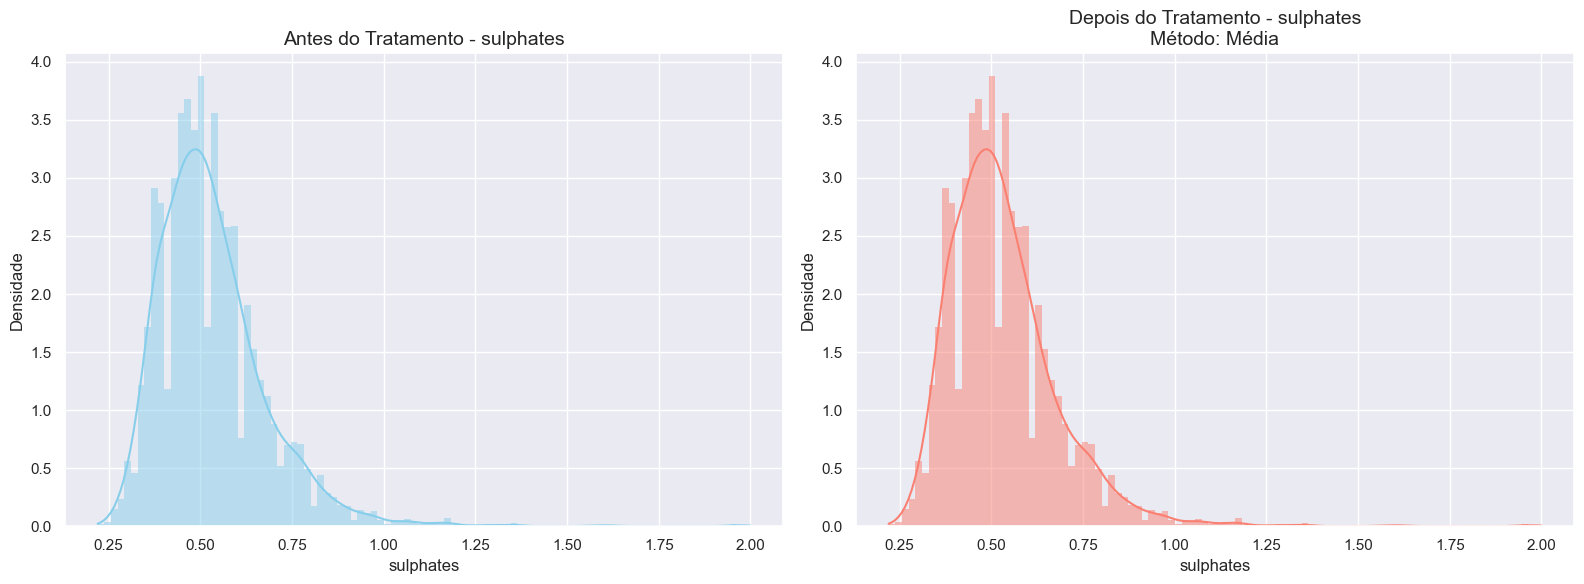

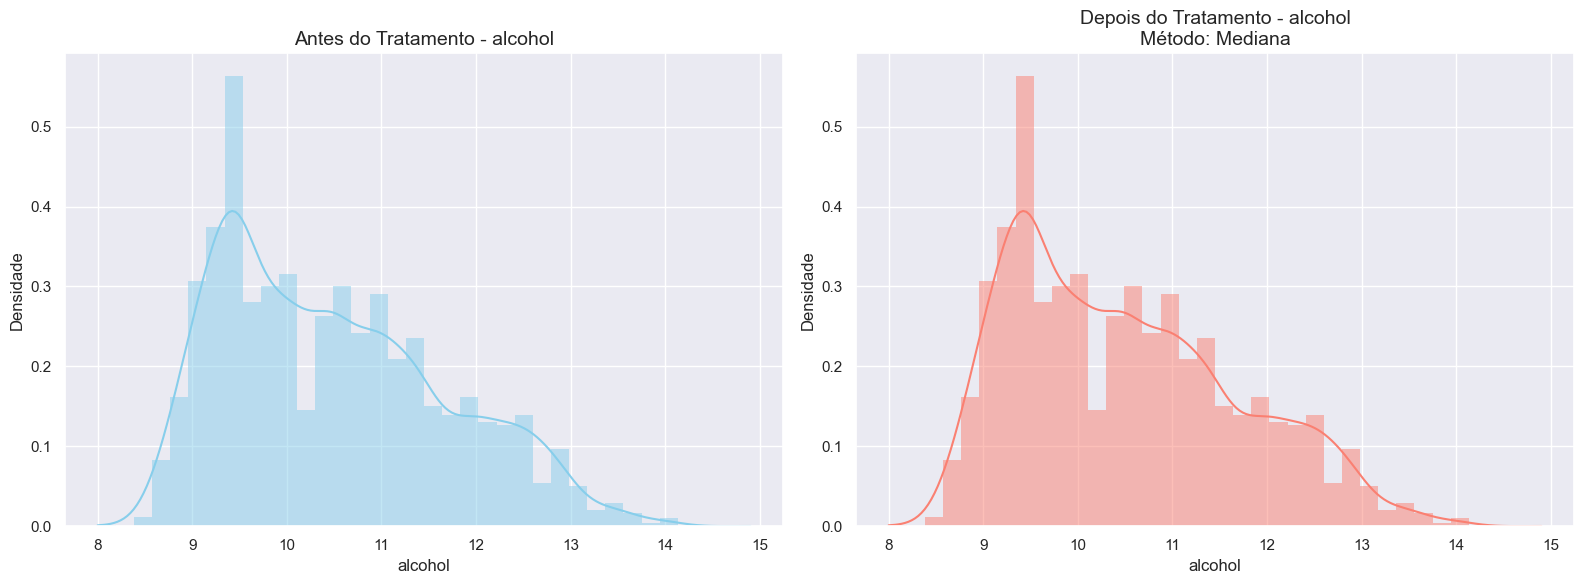

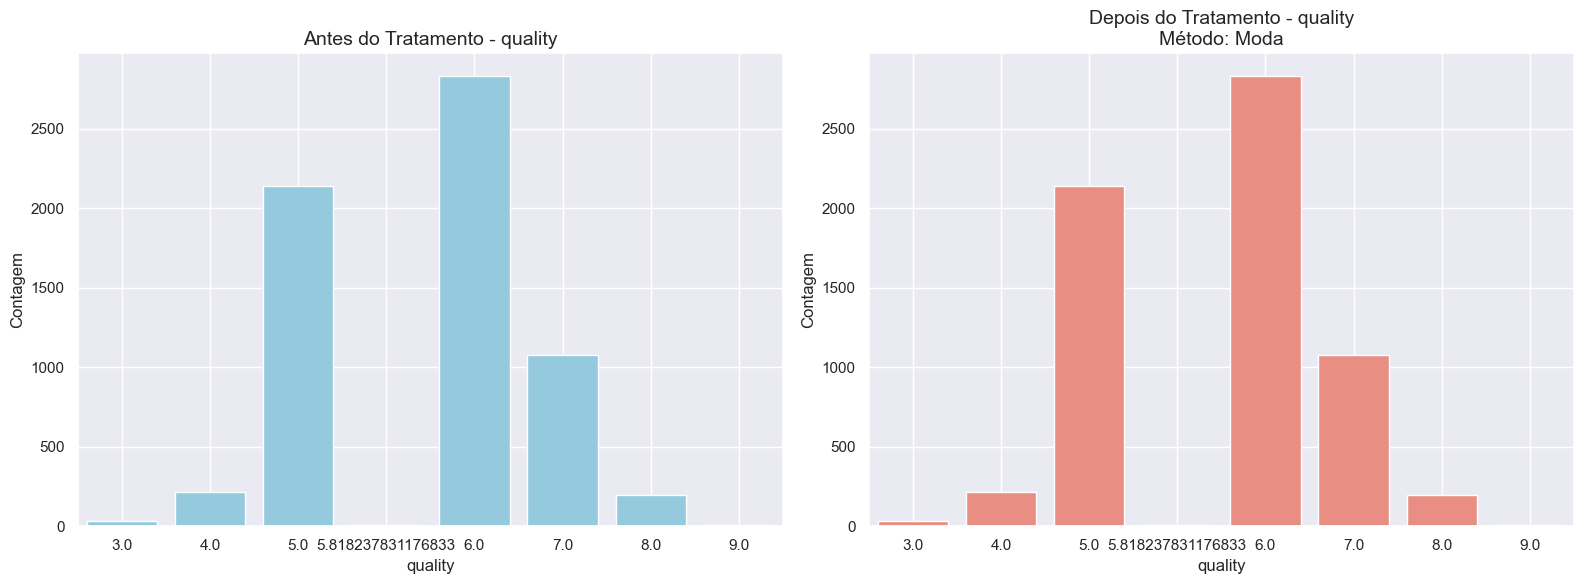

In [62]:
# ================================================
# Função para exibir gráficos de distribuições antes e depois
# ================================================
def plot_distributions_before_after(df, df_treated, column_name, treatment_color):
    # Verifica se a coluna é categórica (ex: 'quality' ou 'color')
    if df[column_name].dtype == 'object' or df[column_name].nunique() < 10:
        # Para variáveis categóricas, fazemos um gráfico de contagem
        fig, axes = plt.subplots(1, 2, figsize=grafico_tamanho)
        
        # Antes do tratamento
        sns.countplot(x=df[column_name], ax=axes[0], color='skyblue')
        axes[0].set_title(f"Antes do Tratamento - {column_name}", fontsize=14)
        axes[0].set_xlabel(column_name, fontsize=12)
        axes[0].set_ylabel('Contagem', fontsize=12)
        axes[0].grid(True)

        # Depois do tratamento
        sns.countplot(x=df_treated[column_name], ax=axes[1], color='salmon')
        axes[1].set_title(f"Depois do Tratamento - {column_name}\nMétodo: {treatment_color}", fontsize=14)
        axes[1].set_xlabel(column_name, fontsize=12)
        axes[1].set_ylabel('Contagem', fontsize=12)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()
    else:
        # Para variáveis numéricas, mostramos o gráfico de densidade
        fig, axes = plt.subplots(1, 2, figsize=grafico_tamanho)
        
        # Antes do tratamento
        sns.histplot(df[column_name], kde=True, color='skyblue', label='Antes do Tratamento', stat="density", linewidth=0, ax=axes[0])
        axes[0].set_title(f"Antes do Tratamento - {column_name}", fontsize=14)
        axes[0].set_xlabel(column_name, fontsize=12)
        axes[0].set_ylabel('Densidade', fontsize=12)
        axes[0].grid(True)

        # Depois do tratamento
        sns.histplot(df_treated[column_name], kde=True, color='salmon', label=f'Depois do Tratamento - {column_name}', stat="density", linewidth=0, ax=axes[1])
        axes[1].set_title(f"Depois do Tratamento - {column_name}\nMétodo: {treatment_type}", fontsize=14)
        axes[1].set_xlabel(column_name, fontsize=12)
        axes[1].set_ylabel('Densidade', fontsize=12)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

# ============================================================
# Comparando as distribuições antes e depois dos tratamentos
# ============================================================

# Tratamento da coluna 'color'
df_treated['color'] = df['color'].fillna(df['color'].mode()[0])  # Preenchendo com a moda (red ou white)
plot_distributions_before_after(df, df_treated, 'color', 'Moda')

# Iterando pelas colunas e aplicando o tratamento conforme o tipo (Moda, Mediana, Média)
for col, decimals in decimal_places.items():
    # Definir o tipo de tratamento baseado na coluna
    if decimals == 0:
        method = df[col].mode()[0]
    elif decimals == 1:
        method = df[col].median()
    else:
        method = df[col].mean()

    # Preencher valores faltantes conforme o método selecionado
    df_treated[f'{col}'] = df[col].fillna(method)
    
    # Plotar as distribuições antes e depois do tratamento
    if decimals == 0:
        treatment_type = 'Moda'
    elif decimals == 1:
        treatment_type = 'Mediana'
    else:
        treatment_type = 'Média'
    
    plot_distributions_before_after(df, df_treated, col, treatment_type)


O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas. 

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

In [ ]:

data_train = pd.read_csv('wines_pre_processing.csv')


print("Valores faltantes em wines_pre_processing.csv:")
print(data_train.isnull().sum())


features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'quality']
target = 'alcohol'


data_complete = data_train.dropna(subset=[target])
X = data_complete[features]

# Convertendo features para numérico
for col in features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convertendo 'alcohol' para numérico
y = pd.to_numeric(data_complete[target], errors='coerce')

# Removendo linhas com valores inválidos
mask = y.notnull() & X.notnull().all(axis=1)
X = X.loc[mask]
y = y[mask]

# Discretizando 'alcohol' em quartis
y_bins = pd.qcut(y, q=4, labels=False, duplicates='drop')


imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bins, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

# Acurácia do teste do treinamento
score = model.score(X_test, y_test)
print(f"Acurácia do modelo no conjunto de teste (wines_pre_processing.csv): {score:.4f}")



Valores faltantes em wines_pre_processing.csv:
Unnamed: 0              0
color                   3
fixed acidity           7
volatile acidity        2
citric acid             4
residual sugar          2
chlorides               7
free sulfur dioxide     2
total sulfur dioxide    1
density                 1
pH                      2
sulphates               6
alcohol                 4
quality                 0
dtype: int64
Acurácia do modelo no conjunto de teste (wines_pre_processing.csv): 0.6819


In [ ]:
# Passo 2: Carregar o dataset de validação (wines.csv)
data_validation = pd.read_csv('wines.csv')  

print("\nValores faltantes em wines.csv:")
print(data_validation.isnull().sum())

# Garantir que as colunas sejam as mesmas e converter 'alcohol' para numérico
data_validation = data_validation[features + [target]]
data_validation[target] = pd.to_numeric(data_validation[target], errors='coerce')


Valores faltantes em wines.csv:
Unnamed: 0              0
color                   3
fixed acidity           7
volatile acidity        2
citric acid             4
residual sugar          2
chlorides               7
free sulfur dioxide     2
total sulfur dioxide    1
density                 1
pH                      2
sulphates               6
alcohol                 4
quality                 0
dtype: int64


In [65]:
# Passo 3: Simular valores faltantes em 'alcohol' para validação
data_with_missing = data_validation.copy()
np.random.seed(42)
mask_missing = np.random.rand(len(data_with_missing)) < 0.1  
original_alcohol = data_with_missing['alcohol'].copy()  
data_with_missing.loc[mask_missing, 'alcohol'] = np.nan

# Função para prever valores faltantes
def predict_missing_alcohol(df, model, features, scaler, imputer):
    mask = df['alcohol'].isnull()
    if mask.sum() == 0:
        return df
    X_missing = df.loc[mask, features]
    for col in features:
        X_missing[col] = pd.to_numeric(X_missing[col], errors='coerce')
    X_missing_imputed = pd.DataFrame(imputer.transform(X_missing), columns=X_missing.columns)
    X_missing_scaled = scaler.transform(X_missing_imputed)
    predictions = model.predict(X_missing_scaled)
    bin_edges = pd.qcut(y, q=4, retbins=True)[1]
    predicted_values = [bin_edges[p] + (bin_edges[p+1] - bin_edges[p])/2 for p in predictions]
    df.loc[mask, 'alcohol'] = predicted_values
    return df


data_filled = predict_missing_alcohol(data_with_missing, model, features, scaler, imputer)

In [66]:
# Passo 4: Categorizar os valores originais e previstos em quartis para métricas de classificação
valid_mask = original_alcohol.notnull()
original_alcohol_clean = original_alcohol[valid_mask]
data_filled_clean = data_filled.loc[valid_mask]
mask_missing_clean = mask_missing[valid_mask]  # Ajustar mask_missing para linhas válidas

# Discretizar valores originais
original_bins = pd.qcut(original_alcohol_clean, q=4, labels=False, duplicates='drop')
predicted_continuous = data_filled_clean['alcohol']
bin_edges = pd.qcut(original_alcohol_clean, q=4, retbins=True)[1]
predicted_bins = pd.cut(predicted_continuous, bins=bin_edges, labels=False, include_lowest=True)

# Filtrar apenas as linhas que tinham valores faltantes originalmente e são válidas
mask_missing_idx = data_filled_clean.index[mask_missing_clean]
y_true = original_bins.loc[mask_missing_idx]
y_pred = predicted_bins.loc[mask_missing_idx]

In [ ]:
# Passo 5: Calcular métricas de classificação
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)


print("\nMétricas de Classificação (comparando categorias previstas vs reais em wines.csv):")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório Completo:")
print(classification_report(y_true, y_pred))


print("\nExemplo de valores originais vs previstos:")
comparison = pd.DataFrame({
    'Original': original_alcohol[mask_missing_idx],
    'Previsto': data_filled['alcohol'][mask_missing_idx],
    'Categoria Original': y_true,
    'Categoria Prevista': y_pred
})
print(comparison.head())


Métricas de Classificação (comparando categorias previstas vs reais em wines.csv):
Acurácia: 0.6865
Precisão: 0.6776
Recall: 0.6865
F1-Score: 0.6805

Matriz de Confusão:
[[159  29   1   1]
 [ 53  60  33   2]
 [  5  38 104  23]
 [  0   1  25 139]]

Relatório Completo:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       190
           1       0.47      0.41      0.43       148
           2       0.64      0.61      0.62       170
           3       0.84      0.84      0.84       165

    accuracy                           0.69       673
   macro avg       0.67      0.67      0.67       673
weighted avg       0.68      0.69      0.68       673


Exemplo de valores originais vs previstos:
    Original  Previsto  Categoria Original  Categoria Prevista
6        9.5      8.75                   0                   0
10      12.7     13.10                   3                   3
29      13.6     13.10                   3                   3


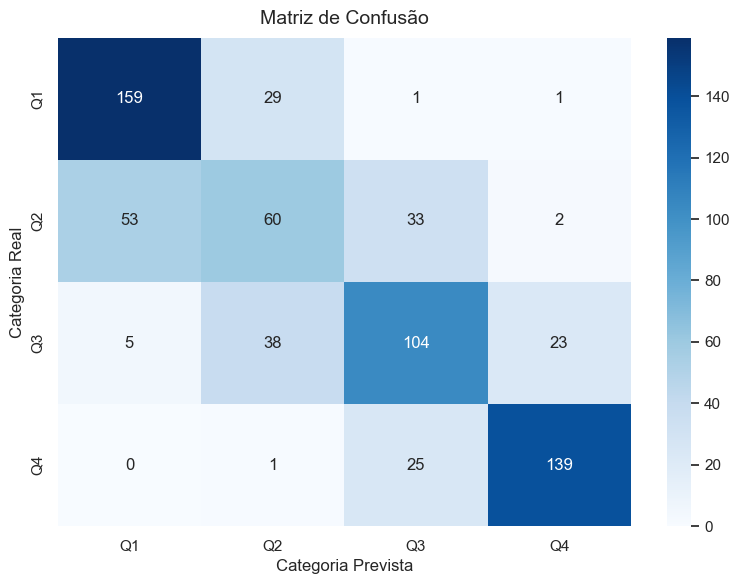

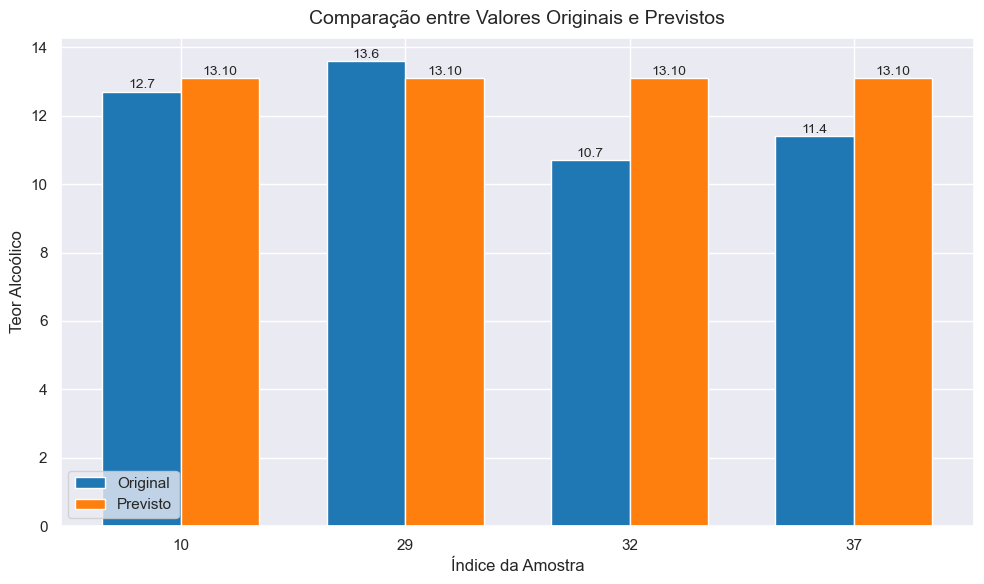

In [68]:

sns.set()  

confusion_matrix = np.array([[159, 29, 1, 1],
                             [53, 60, 33, 2],
                             [5, 38, 104, 23],
                             [0, 1, 25, 139]])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Q1', 'Q2', 'Q3', 'Q4'], yticklabels=['Q1', 'Q2', 'Q3', 'Q4'], 
            ax=ax)
ax.set_title('Matriz de Confusão', fontsize=14, pad=10)
ax.set_xlabel('Categoria Prevista', fontsize=12)
ax.set_ylabel('Categoria Real', fontsize=12)
plt.tight_layout()
plt.show()


comparison_data = pd.DataFrame({
    'Índice': [10, 29, 32, 37],
    'Original': [12.7, 13.6, 10.7, 11.4],
    'Previsto': [13.10, 13.10, 13.10, 13.10],
    'Categoria Original': [3, 3, 2, 3],
    'Categoria Prevista': [3, 3, 3, 3]
})

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_data['Índice']))
width = 0.35

ax.bar(x - width/2, comparison_data['Original'], width, label='Original', color='#1f77b4')
ax.bar(x + width/2, comparison_data['Previsto'], width, label='Previsto', color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data['Índice'])
ax.set_title('Comparação entre Valores Originais e Previstos', fontsize=14, pad=10)
ax.set_xlabel('Índice da Amostra', fontsize=12)
ax.set_ylabel('Teor Alcoólico', fontsize=12)
ax.legend()
for i, (orig, pred) in enumerate(zip(comparison_data['Original'], comparison_data['Previsto'])):
    ax.text(i - width/2, orig + 0.1, f'{orig:.1f}', ha='center', fontsize=10)
    ax.text(i + width/2, pred + 0.1, f'{pred:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, reuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade. 
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.


 ❌ Quantidade de outliers removidos: 118

 ✔️ Pares de variáveis com correlação forte selecionados: [('total sulfur dioxide', 'free sulfur dioxide'), ('density', 'alcohol'), ('residual sugar', 'density'), ('total sulfur dioxide', 'residual sugar'), ('fixed acidity', 'density'), ('quality', 'alcohol'), ('total sulfur dioxide', 'volatile acidity'), ('residual sugar', 'free sulfur dioxide')]


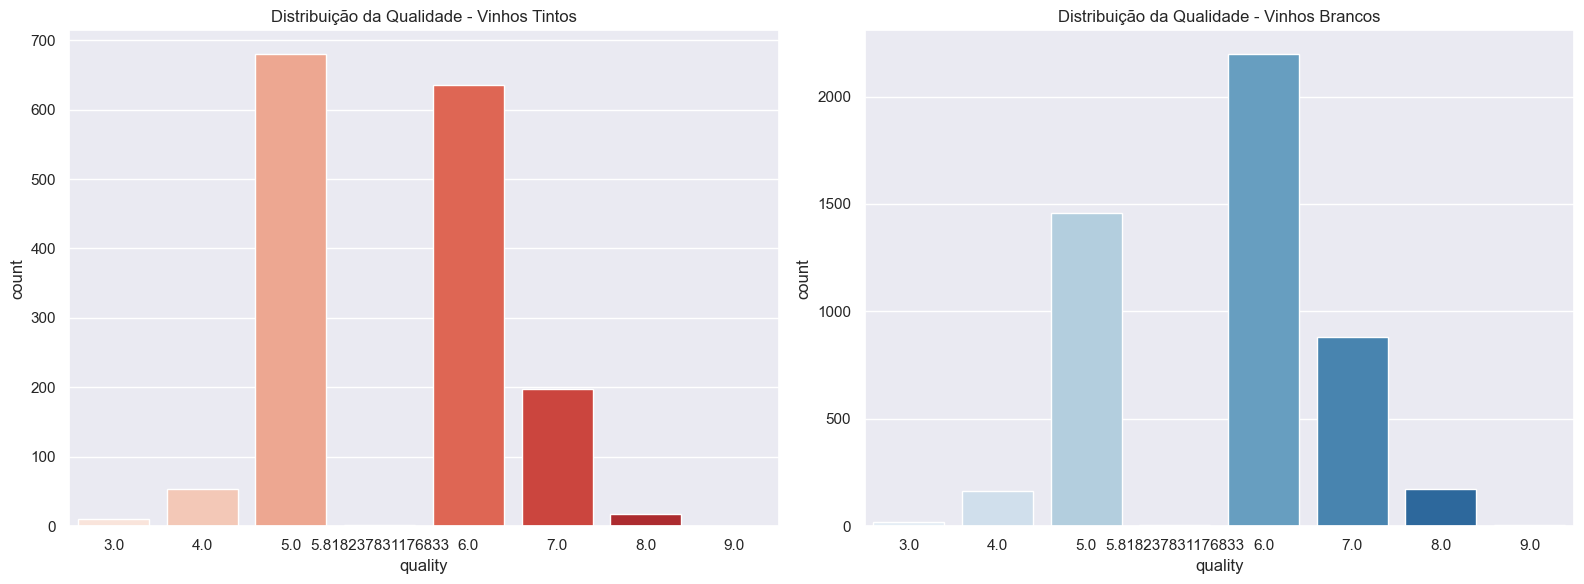

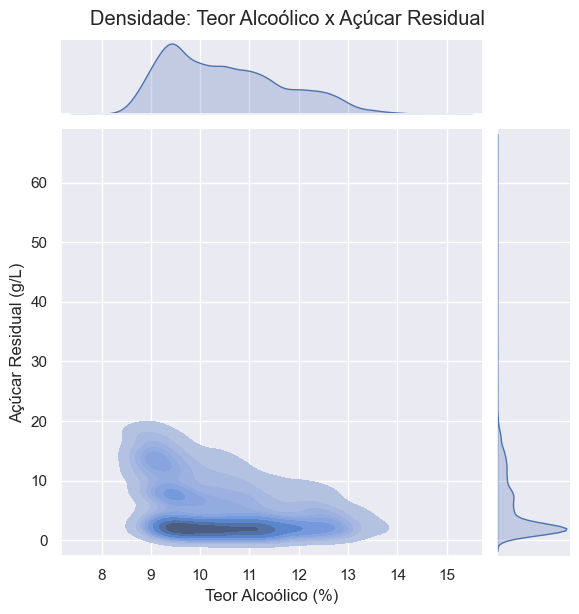

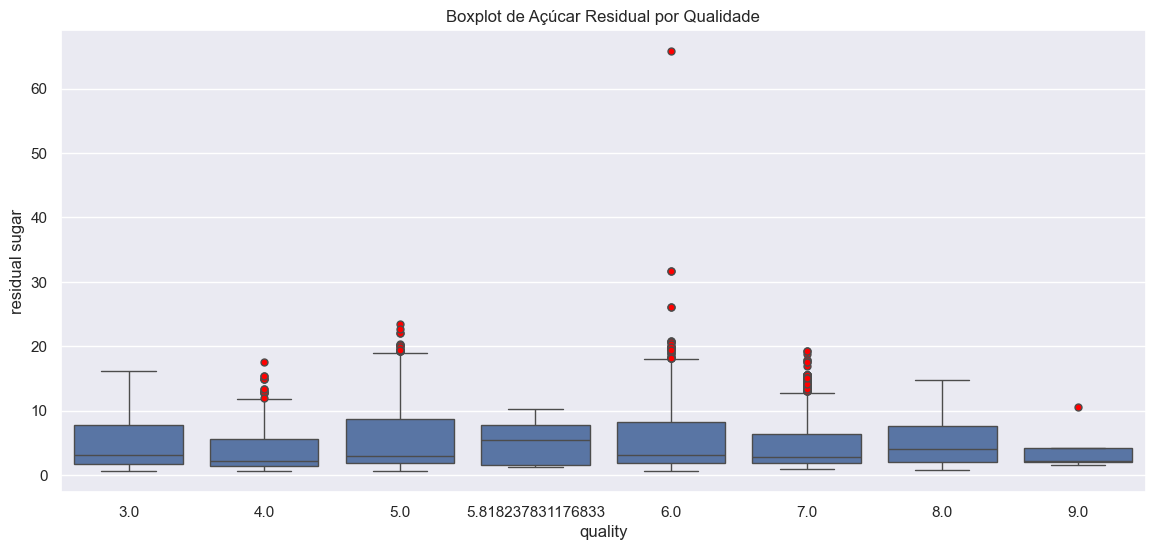

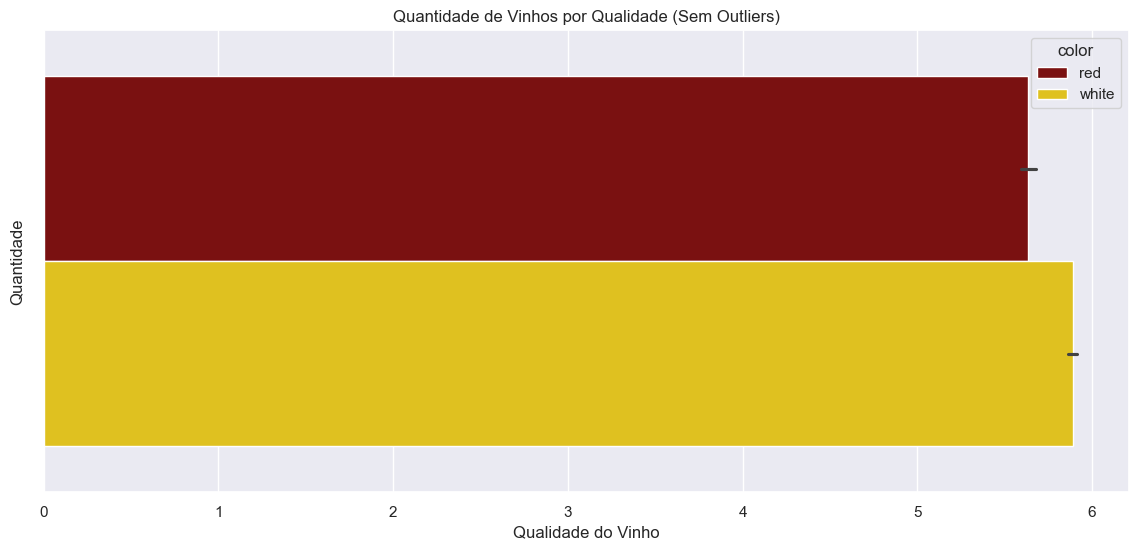

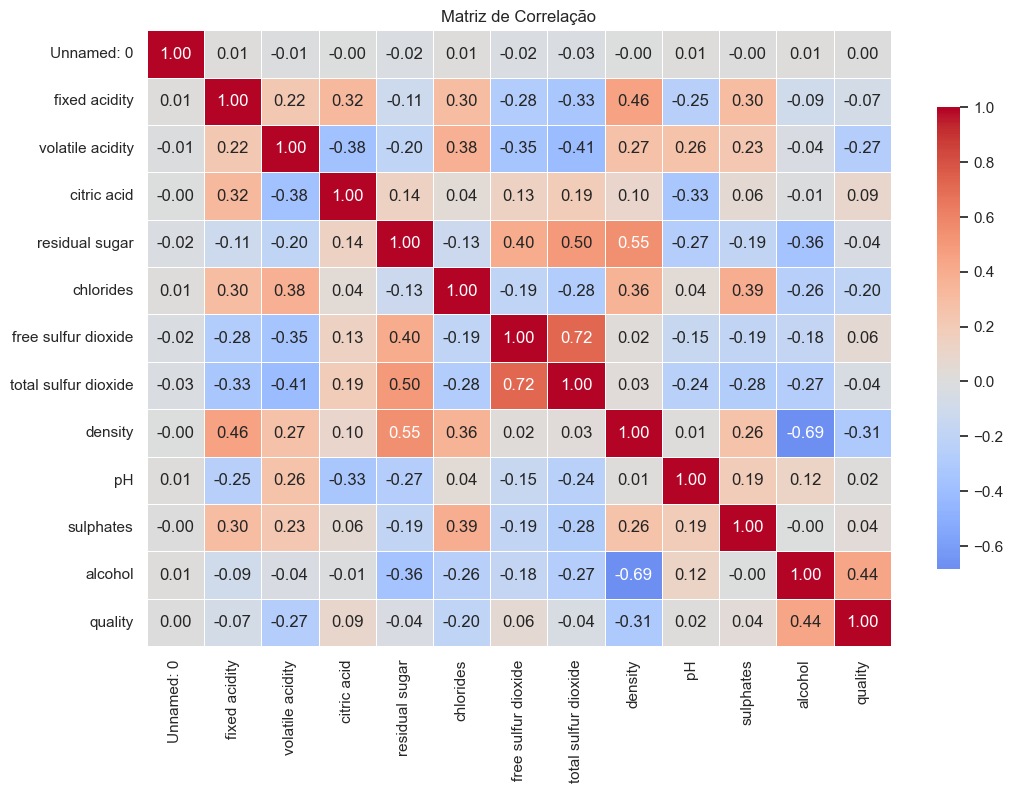

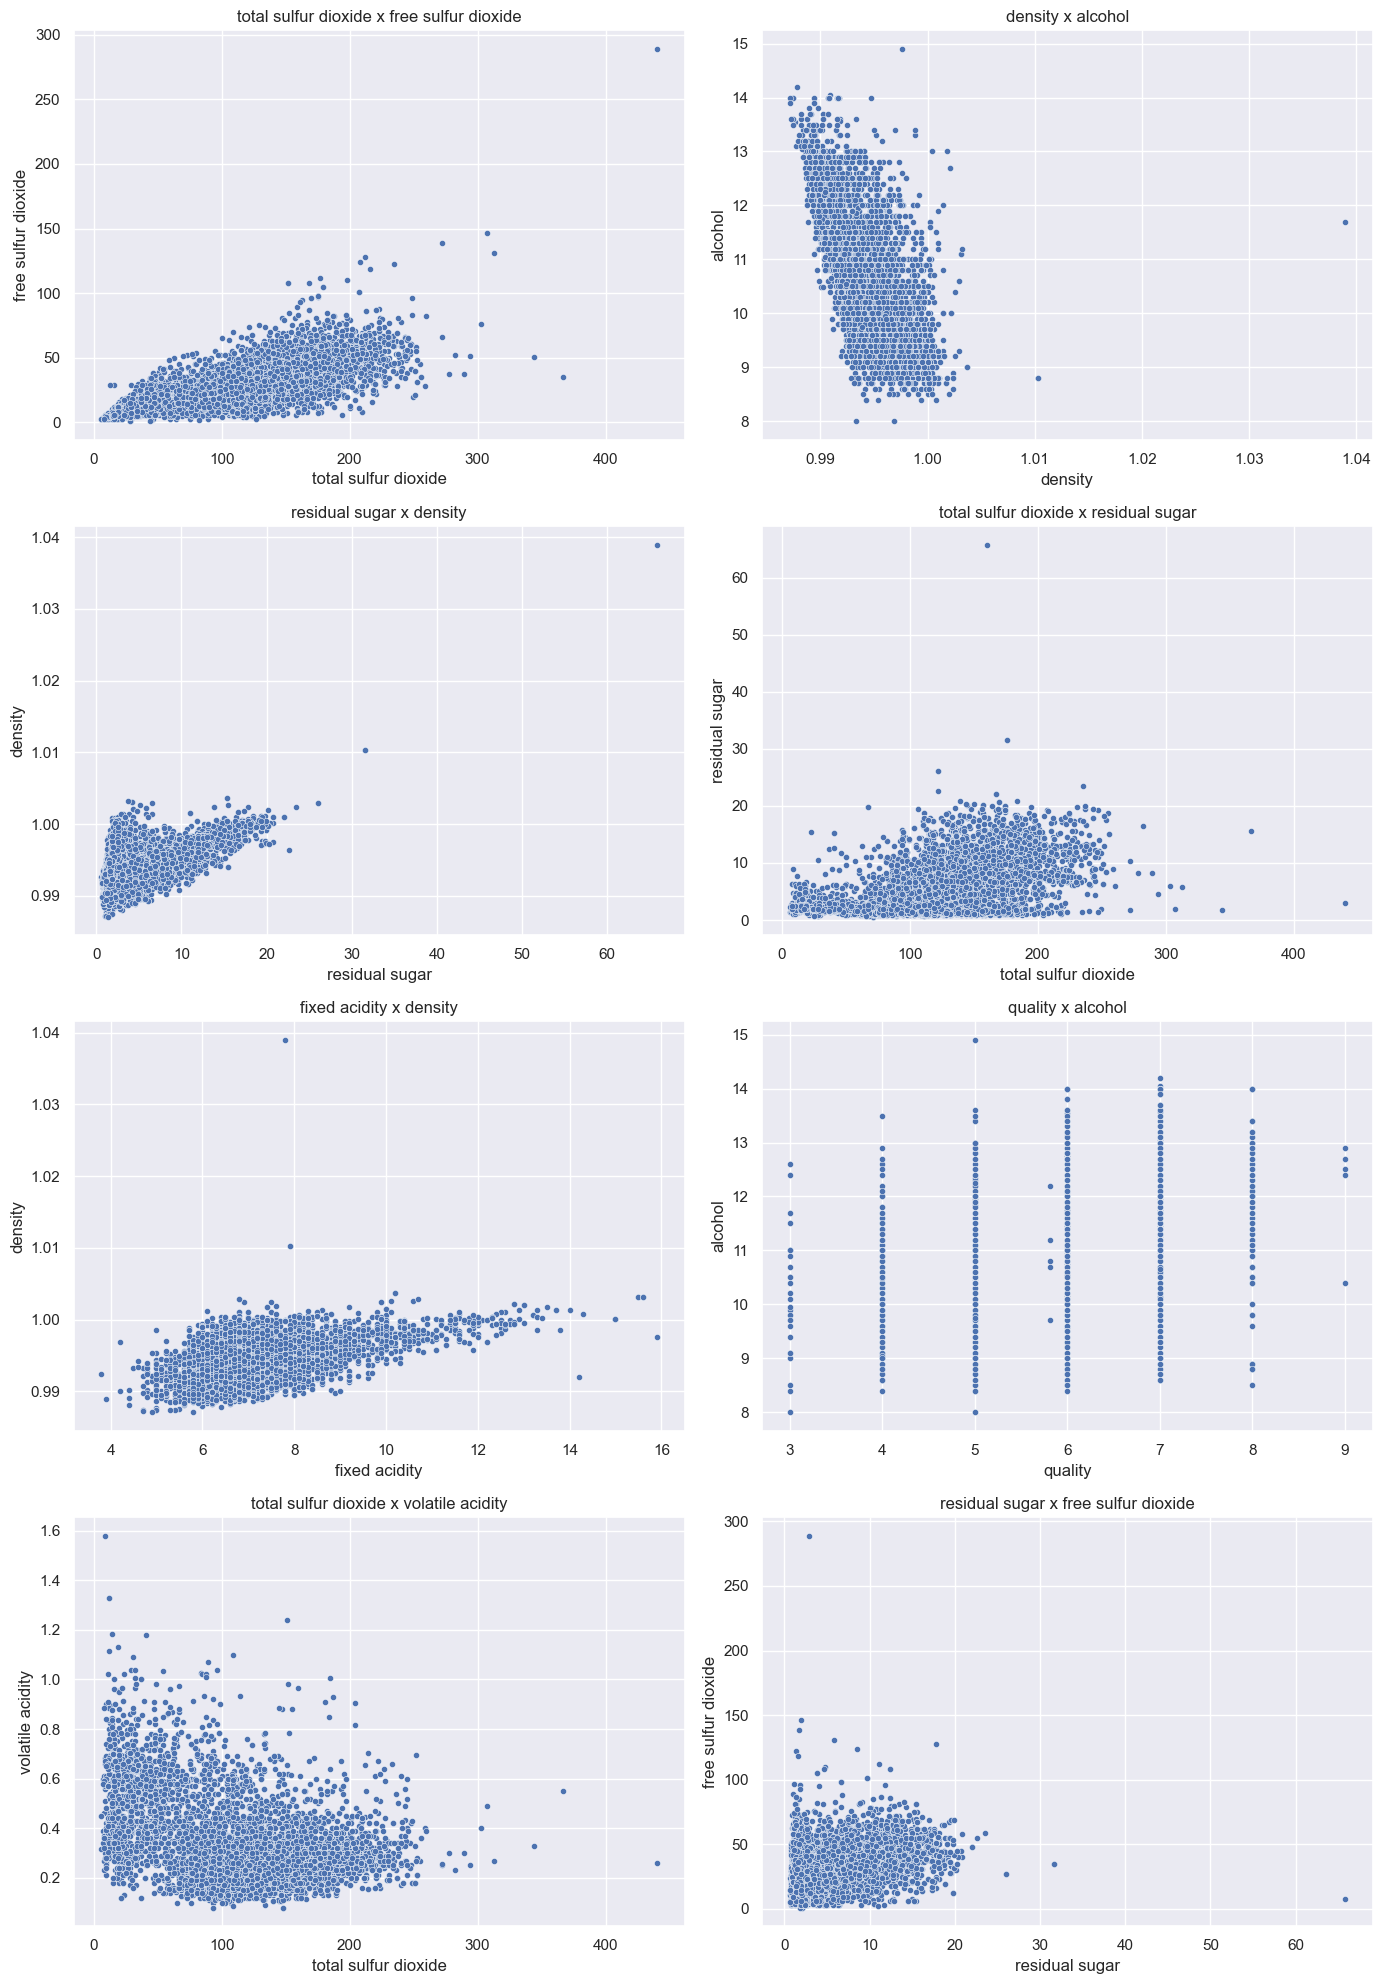

In [ ]:

grafico_tamanho = (14, 6)

# Remover outliers
Q1, Q3 = df_treated['residual sugar'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df_treated[(df_treated['residual sugar'] < Q1 - 1.5 * IQR) | 
                       (df_treated['residual sugar'] > Q3 + 1.5 * IQR)]

if not outliers.empty:
    print("\n==============================================================")
    print(f" ❌ Quantidade de outliers removidos: {len(outliers)}")
    print("==============================================================")
    df_no_outliers = df_treated.drop(outliers.index).reset_index(drop=True)
else:
    print("\n==============================================================")
    print(" ⚠️ Nenhum outlier detectado.")
    print("==============================================================")
    df_no_outliers = df_treated.copy()

# Identificando correlações fortes (|r| > 0.4)
correlation_matrix = df_treated.drop(columns=['color']).corr()
correlacoes_fortes = correlation_matrix.unstack().abs().sort_values(ascending=False)
correlacoes_fortes = correlacoes_fortes[(correlacoes_fortes > 0.4) & (correlacoes_fortes < 1)]

# Removendo pares duplicados
pares_unicos = set()
pares_selecionados = []

for (x, y) in correlacoes_fortes.index:
    if (y, x) not in pares_unicos:
        pares_unicos.add((x, y))
        pares_selecionados.append((x, y))

print("\n==============================================================")
print(" ✔️ Pares de variáveis com correlação forte selecionados:", pares_selecionados)
print("==============================================================")

# 1️ Countplot: Quantidade de vinhos por qualidade para cada tipo (tinto e branco)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df_treated[df_treated['color'] == 'red'], x='quality', ax=axes[0], palette="Reds", order=sorted(df_treated['quality'].unique()))
axes[0].set_title('Distribuição da Qualidade - Vinhos Tintos')

sns.countplot(data=df_treated[df_treated['color'] == 'white'], x='quality', ax=axes[1], palette="Blues", order=sorted(df_treated['quality'].unique()))
axes[1].set_title('Distribuição da Qualidade - Vinhos Brancos')

plt.tight_layout()
plt.show()

# 2️ Jointplot KDE para álcool x açúcar residual
g = sns.jointplot(data=df_treated, x='alcohol', y='residual sugar', kind='kde', fill=True)
g.set_axis_labels("Teor Alcoólico (%)", "Açúcar Residual (g/L)")
g.fig.suptitle("Densidade: Teor Alcoólico x Açúcar Residual", y=1.02)
plt.show()

# 3️ Boxplot para detecção de outliers
plt.figure(figsize=grafico_tamanho)
sns.boxplot(data=df_treated, x='quality', y='residual sugar', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5})
plt.title("Boxplot de Açúcar Residual por Qualidade")
plt.show()

# 4️ Barplot sobreposto da contagem de vinhos por qualidade após remoção de outliers
plt.figure(figsize=grafico_tamanho)
sns.barplot(data=df_no_outliers, x='quality', hue='color', palette={'red': 'darkred', 'white': 'gold'}, hue_order=['red', 'white'])
plt.title("Quantidade de Vinhos por Qualidade (Sem Outliers)")
plt.xlabel("Qualidade do Vinho")
plt.ylabel("Quantidade")
plt.show()

# 5️ Matriz de correlação (Sem converter 'color' para numérico)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0, cbar_kws={'shrink': 0.75})
plt.title('Matriz de Correlação')
plt.show()

# 6️ Scatterplots para correlações selecionadas
if pares_selecionados:
    fig, axes = plt.subplots(len(pares_selecionados) // 2, 2, figsize=(14, 5 * (len(pares_selecionados) // 2)))
    
    for ax, (x, y) in zip(axes.flatten(), pares_selecionados):
        sns.scatterplot(data=df_treated, x=x, y=y, ax=ax, s=20)
        ax.set_title(f"{x} x {y}")
        ax.set_xlabel(x)
        ax.set_ylabel(y)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n==============================================================")
    print(" ⚠️ Nenhuma correlação forte encontrada para exibição de scatterplots.")
    print("==============================================================")


# Modelos Supervisionados 

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe. 

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer. 

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias". 

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação. 

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


               Model   ROC AUC
0      Decision Tree  0.894787
1      Random Forest  0.972464
2  Gradient Boosting  0.876994
3                SVM  0.855235
4                KNN  0.880382
Pergunta 1: Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação.
Resposta: Foram utilizados Decision Tree, Random Forest, Gradient Boosting, SVM e KNN. O código acima mostra a definição e treinamento desses modelos.

Pergunta 2: Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.
Resposta:
               Model   ROC AUC
0      Decision Tree  0.894787
1      Random Forest  0.972464
2  Gradient Boosting  0.876994
3                SVM  0.855235
4                KNN  0.880382

Pergunta 3: Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.
Resposta:
Escolha do Melhor Modelo: O Random Forest foi identificado como o melhor modelo com base na sua maior 

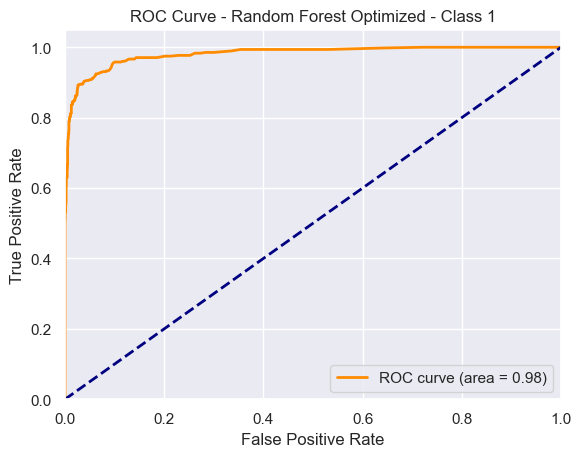

In [ ]:

data = pd.read_csv('wine_classification.csv')

X = data.drop('quality', axis=1) 
y = data['quality']


# 1. Padronização das features
features_to_scale = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features_to_scale])
X[features_to_scale] = X_scaled

# 2. Tratamento de Outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_cleaned = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned = y[X_cleaned.index]

# 3. Engenharia de Features
X_cleaned['sulfur_ratio'] = X_cleaned['free sulfur dioxide'] / X_cleaned['total sulfur dioxide']

# 4. Seleção de Features
selector = SelectKBest(f_classif, k=5) 
X_selected = selector.fit_transform(X_cleaned, y_cleaned)
feature_names = X_cleaned.columns[selector.get_support(indices=True)]


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_cleaned)


X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Definição dos modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Treinamento e Avaliação dos Modelos
results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)

    aucs = []
    for i in range(y_pred_proba.shape[1]):
        auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
        aucs.append(auc)
    
    # Media das AUCs
    avg_auc = np.mean(aucs)
    
    results.append({
        'Model': name,
        'ROC AUC': avg_auc
    })

# Criação de um DataFrame com os resultados
results_df = pd.DataFrame(results)
print(results_df)



# Identificação do melhor modelo
best_model_name = results_df.loc[results_df['ROC AUC'].idxmax(), 'Model']
best_model = models[best_model_name]

# Ajuste dos parâmetros de RandomizedSearchCV para RandomForestClassifier
if best_model_name == 'Random Forest':
    param_distributions = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
elif best_model_name == 'SVM':
    param_distributions = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1]
    }



random_search = RandomizedSearchCV(
    best_model, 
    param_distributions, 
    n_iter=10, 
    cv=3,       
    scoring='roc_auc_ovr',
    random_state=42
)
random_search.fit(X_train, y_train)

print("==================================================")
print("Pergunta 1: Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação.")
print("Resposta: Foram utilizados Decision Tree, Random Forest, Gradient Boosting, SVM e KNN. O código acima mostra a definição e treinamento desses modelos.")

print("\n==================================================")
print("Pergunta 2: Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.")
print("Resposta:")
print(results_df)

print("\n==================================================")
print("Pergunta 3: Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.")
print("Resposta:")
print("Escolha do Melhor Modelo: O Random Forest foi identificado como o melhor modelo com base na sua maior pontuação ROC AUC.")
print("Melhores Parâmetros:", random_search.best_params_)
print("Melhor ROC AUC:", random_search.best_score_)


y_pred_proba_best = random_search.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test == 1, y_pred_proba_best[:, 1]) 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_score(y_test == 1, y_pred_proba_best[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} Optimized - Class 1')
plt.legend(loc="lower right")
plt.show()

print("==================================================")

Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

Resultados do Naive Bayes (GaussianNB):
ROC AUC Média: 0.7792


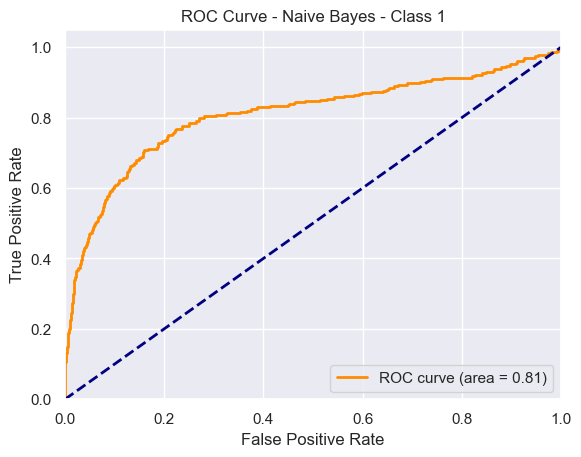


## Limitação Principal do Naive Bayes em Problemas Complexos

### A Suposição 'Ingênua' de Independência  
O **Naive Bayes**, baseado no Teorema de Bayes criado por Thomas Bayes, assume que todas as features (variáveis como acidez, pH ou teor alcoólico) são **independentes entre si**, dado o valor da classe. Essa é a chamada **hipótese de independência condicional**.  
 No entanto, em problemas reais como a classificação de vinhos, essas variáveis frequentemente apresentam **correlações naturais** — por exemplo, o pH e a acidez fixa estão quimicamente relacionados.  
 Ao ignorar essas dependências, o Naive Bayes simplifica demais o problema, o que pode levar a uma **modelagem inadequada** e **desempenho inferior** em datasets complexos.

### Limitação em Capturar Interações  
Diferente de algoritmos como **Random Forest** ou **Gradient Boosting**, que conseguem capturar **interações complexas** entre features, o Naive Bayes trata cada variável isoladamente.  
 Isso o torna menos robusto em cenários onde o sucesso da classificação depende de entender como as features trabalham juntas, não apenas separadamente.

### Sensibilidade a Dados Reais  
O modelo **GaussianNB**, usado aqui, assume que as features seguem uma **distribuição Gaussiana**. Se os dados (como o teor de açúcar residual ou dióxido de enxofre) não se ajustarem bem a essa distribuição, o desempenho pode ser comprometido.  
 Apesar de técnicas como padronização ajudarem, elas não eliminam completamente essa limitação.

---
### Por Que Isso Importa?  
Em resumo, embora o Naive Bayes seja rápido e eficiente em problemas simples ou com features verdadeiramente independentes, ele **falha em capturar a complexidade** de datasets como o de vinhos, onde as relações entre variáveis são cruciais. Para tarefas mais sofisticadas, modelos que consideram essas interações tendem a ser mais eficazes.


In [ ]:

data = pd.read_csv('wine_classification.csv')

X = data.drop('quality', axis=1)
y = data['quality']


# 1. Padronização das features
features_to_scale = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features_to_scale])
X[features_to_scale] = X_scaled

# 2. Tratamento de Outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_cleaned = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned = y[X_cleaned.index]

# 3. Engenharia de Features
X_cleaned['sulfur_ratio'] = X_cleaned['free sulfur dioxide'] / X_cleaned['total sulfur dioxide']

# 4. Codificação do alvo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_cleaned)

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_encoded, test_size=0.2, random_state=42)

# Definição do modelo Naive Bayes
nb_model = GaussianNB()

# Treinando o modelo
nb_model.fit(X_train, y_train)

# Predição e cálculo da ROC AUC
y_pred_proba = nb_model.predict_proba(X_test)
aucs = []
for i in range(y_pred_proba.shape[1]):
    auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
    aucs.append(auc)
avg_auc = np.mean(aucs)


print("==================================================")
print("Resultados do Naive Bayes (GaussianNB):")
print(f"ROC AUC Média: {avg_auc:.4f}")


fpr, tpr, _ = roc_curve(y_test == 1, y_pred_proba[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_score(y_test == 1, y_pred_proba[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes - Class 1')
plt.legend(loc="lower right")
plt.show()


explicacao = """
## Limitação Principal do Naive Bayes em Problemas Complexos

### A Suposição 'Ingênua' de Independência  
O **Naive Bayes**, baseado no Teorema de Bayes criado por Thomas Bayes, assume que todas as features (variáveis como acidez, pH ou teor alcoólico) são **independentes entre si**, dado o valor da classe. Essa é a chamada **hipótese de independência condicional**.  
 No entanto, em problemas reais como a classificação de vinhos, essas variáveis frequentemente apresentam **correlações naturais** — por exemplo, o pH e a acidez fixa estão quimicamente relacionados.  
 Ao ignorar essas dependências, o Naive Bayes simplifica demais o problema, o que pode levar a uma **modelagem inadequada** e **desempenho inferior** em datasets complexos.

### Limitação em Capturar Interações  
Diferente de algoritmos como **Random Forest** ou **Gradient Boosting**, que conseguem capturar **interações complexas** entre features, o Naive Bayes trata cada variável isoladamente.  
 Isso o torna menos robusto em cenários onde o sucesso da classificação depende de entender como as features trabalham juntas, não apenas separadamente.

### Sensibilidade a Dados Reais  
O modelo **GaussianNB**, usado aqui, assume que as features seguem uma **distribuição Gaussiana**. Se os dados (como o teor de açúcar residual ou dióxido de enxofre) não se ajustarem bem a essa distribuição, o desempenho pode ser comprometido.  
 Apesar de técnicas como padronização ajudarem, elas não eliminam completamente essa limitação.

---
### Por Que Isso Importa?  
Em resumo, embora o Naive Bayes seja rápido e eficiente em problemas simples ou com features verdadeiramente independentes, ele **falha em capturar a complexidade** de datasets como o de vinhos, onde as relações entre variáveis são cruciais. Para tarefas mais sofisticadas, modelos que consideram essas interações tendem a ser mais eficazes.
"""


display(Markdown(explicacao))

Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise. 

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse com a base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta. 


In [ ]:

df_vinho = pd.read_csv("desafio.csv")

df_vinho = df_vinho.drop(columns=['Unnamed: 0', 'index'], errors='ignore')

# Filtrar apenas vinhos de qualidade 8 ou 9
df_filtered = df_vinho[df_vinho['quality'].isin([8, 9])]

X = df_filtered.drop(columns=['quality'])
y = df_filtered['quality']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto completo de dados
df_filtered['predicted_quality'] = model.predict(X_scaled)

# Selecionando 3 melhores vinhos para servir 
best_wines = df_filtered[df_filtered['predicted_quality'] == 9].sample(n=3, random_state=42)


print("Os três vinhos selecionados para o Dr. Anton Ego são:")
best_wines_display = best_wines[['fixed acidity', 'volatile acidity', 'alcohol', 'quality', 'predicted_quality']]
best_wines_display.columns = ['Acidez Fixa', 'Acidez Volátil', 'Álcool (%)', 'Qualidade Real', 'Qualidade Prevista']
display(best_wines_display.style.set_properties(**{'text-align': 'center'}).set_caption("Tabela de Vinhos Selecionados"))


explicacao = """
## Modelo de Machine Learning Utilizado: Random Forest

### Por Que Escolher Random Forest?  
O Random Forest é ideal para este problema porque:  
- **Lida bem com correlações**: As features dos vinhos (ex.: acidez fixa e volátil) podem estar correlacionadas, e o modelo consegue modelar essas relações.  
- **Resistente a overfitting**: Com 100 árvores (n_estimators=100), ele reduz o risco de superajuste aos dados de treinamento.  
- **Alta precisão**: Sua capacidade de ponderar múltiplas decisões o torna eficaz para classificar vinhos entre qualidade 8 e 9.

### Comparação com Naive Bayes  
 Diferente do **Naive Bayes**, que sofre com a suposição de independência condicional e pode falhar em problemas complexos, o Random Forest é mais flexível e poderoso, especialmente em datasets como este, onde as variáveis químicas dos vinhos interagem de maneira intricada.

### Resultado Prático  
O modelo foi treinado para prever a qualidade dos vinhos (8 ou 9) e selecionou os 3 melhores com previsão de qualidade 9, garantindo uma escolha confiável para o Dr. Anton Ego!
"""

display(Markdown(explicacao))

Os três vinhos selecionados para o Dr. Anton Ego são:


,Acidez Fixa,Acidez Volátil,Álcool (%),Qualidade Real,Qualidade Prevista
13879,9.627148,1.196482,10.747989,9.000000,9.000000
13880,7.599682,1.245215,11.744192,9.000000,9.000000
13884,10.386206,1.211007,11.507041,8.000000,9.000000



## Modelo de Machine Learning Utilizado: Random Forest

### Por Que Escolher Random Forest?  
O Random Forest é ideal para este problema porque:  
- **Lida bem com correlações**: As features dos vinhos (ex.: acidez fixa e volátil) podem estar correlacionadas, e o modelo consegue modelar essas relações.  
- **Resistente a overfitting**: Com 100 árvores (n_estimators=100), ele reduz o risco de superajuste aos dados de treinamento.  
- **Alta precisão**: Sua capacidade de ponderar múltiplas decisões o torna eficaz para classificar vinhos entre qualidade 8 e 9.

### Comparação com Naive Bayes  
 Diferente do **Naive Bayes**, que sofre com a suposição de independência condicional e pode falhar em problemas complexos, o Random Forest é mais flexível e poderoso, especialmente em datasets como este, onde as variáveis químicas dos vinhos interagem de maneira intricada.

### Resultado Prático  
O modelo foi treinado para prever a qualidade dos vinhos (8 ou 9) e selecionou os 3 melhores com previsão de qualidade 9, garantindo uma escolha confiável para o Dr. Anton Ego!


### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência. 

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines. 

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

## Análise PCA do Dataset Original (Wines)

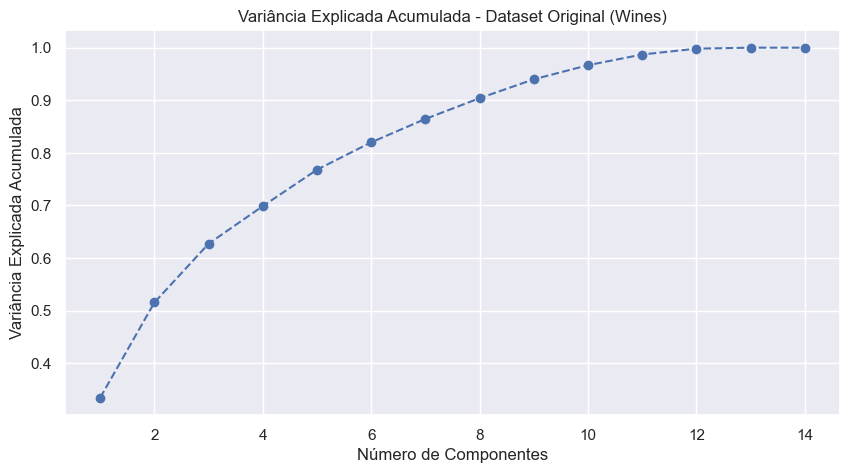

**Variância Explicada por Componente - Dataset Original (Wines):**

Componente 1: 0.3343

Componente 2: 0.1811

Componente 3: 0.1118

Componente 4: 0.0715

Componente 5: 0.0693

Componente 6: 0.0520

Componente 7: 0.0445

Componente 8: 0.0395

Componente 9: 0.0359

Componente 10: 0.0268

Componente 11: 0.0203

Componente 12: 0.0111

Componente 13: 0.0019

Componente 14: 0.0000

**Variância Explicada Acumulada - Dataset Original (Wines):**

Componente 1: 0.3343

Componente 2: 0.5154

Componente 3: 0.6272

Componente 4: 0.6986

Componente 5: 0.7679

Componente 6: 0.8200

Componente 7: 0.8645

Componente 8: 0.9039

Componente 9: 0.9398

Componente 10: 0.9667

Componente 11: 0.9870

Componente 12: 0.9981

Componente 13: 1.0000

Componente 14: 1.0000

## Análise PCA do Dataset com Splines (Wines Splines)

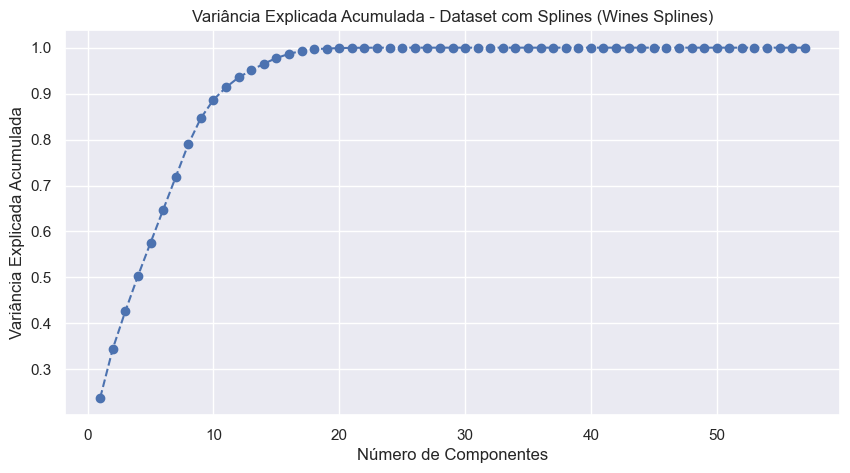

**Variância Explicada por Componente - Dataset com Splines (Wines Splines):**

Componente 1: 0.2383

Componente 2: 0.1066

Componente 3: 0.0818

Componente 4: 0.0767

Componente 5: 0.0721

Componente 6: 0.0715

Componente 7: 0.0715

Componente 8: 0.0713

Componente 9: 0.0569

Componente 10: 0.0398

Componente 11: 0.0271

Componente 12: 0.0216

Componente 13: 0.0154

Componente 14: 0.0143

Componente 15: 0.0125

Componente 16: 0.0090

Componente 17: 0.0066

Componente 18: 0.0037

Componente 19: 0.0014

Componente 20: 0.0010

Componente 21: 0.0006

Componente 22: 0.0002

Componente 23: 0.0001

Componente 24: 0.0000

Componente 25: 0.0000

Componente 26: 0.0000

Componente 27: 0.0000

Componente 28: 0.0000

Componente 29: 0.0000

Componente 30: 0.0000

Componente 31: 0.0000

Componente 32: 0.0000

Componente 33: 0.0000

Componente 34: 0.0000

Componente 35: 0.0000

Componente 36: 0.0000

Componente 37: 0.0000

Componente 38: 0.0000

Componente 39: 0.0000

Componente 40: 0.0000

Componente 41: 0.0000

Componente 42: 0.0000

Componente 43: 0.0000

Componente 44: 0.0000

Componente 45: 0.0000

Componente 46: 0.0000

Componente 47: 0.0000

Componente 48: 0.0000

Componente 49: 0.0000

Componente 50: 0.0000

Componente 51: 0.0000

Componente 52: 0.0000

Componente 53: 0.0000

Componente 54: 0.0000

Componente 55: 0.0000

Componente 56: 0.0000

Componente 57: 0.0000

**Variância Explicada Acumulada - Dataset com Splines (Wines Splines):**

Componente 1: 0.2383

Componente 2: 0.3450

Componente 3: 0.4267

Componente 4: 0.5034

Componente 5: 0.5755

Componente 6: 0.6470

Componente 7: 0.7185

Componente 8: 0.7898

Componente 9: 0.8468

Componente 10: 0.8866

Componente 11: 0.9137

Componente 12: 0.9353

Componente 13: 0.9507

Componente 14: 0.9650

Componente 15: 0.9775

Componente 16: 0.9864

Componente 17: 0.9930

Componente 18: 0.9967

Componente 19: 0.9981

Componente 20: 0.9991

Componente 21: 0.9997

Componente 22: 0.9999

Componente 23: 0.9999

Componente 24: 1.0000

Componente 25: 1.0000

Componente 26: 1.0000

Componente 27: 1.0000

Componente 28: 1.0000

Componente 29: 1.0000

Componente 30: 1.0000

Componente 31: 1.0000

Componente 32: 1.0000

Componente 33: 1.0000

Componente 34: 1.0000

Componente 35: 1.0000

Componente 36: 1.0000

Componente 37: 1.0000

Componente 38: 1.0000

Componente 39: 1.0000

Componente 40: 1.0000

Componente 41: 1.0000

Componente 42: 1.0000

Componente 43: 1.0000

Componente 44: 1.0000

Componente 45: 1.0000

Componente 46: 1.0000

Componente 47: 1.0000

Componente 48: 1.0000

Componente 49: 1.0000

Componente 50: 1.0000

Componente 51: 1.0000

Componente 52: 1.0000

Componente 53: 1.0000

Componente 54: 1.0000

Componente 55: 1.0000

Componente 56: 1.0000

Componente 57: 1.0000

## Análise sobre PCA e ruídos:

O PCA pode ser uma boa abordagem para o dataset com Splines se o objetivo for reduzir a dimensionalidade e manter uma quantidade razoável da variância explicada. No entanto, a eficácia do PCA depende da estrutura dos dados transformados por Splines.

A influência de ruídos pode ser amplificada com Splines, pois a técnica pode ajustar-se a pequenas variações nos dados. Se os ruídos não forem controlados, o PCA pode acabar retendo componentes principais que representam esses ruídos, em vez de informações relevantes.

## Número de Componentes para Variância > 0.92


Número de features para variância > 0.92 no Dataset Original (Wines): 9


Número de features para variância > 0.92 no Dataset com Splines (Wines Splines): 12

In [ ]:

try:
    wines_splines = pd.read_csv('wines_splines.csv')
except FileNotFoundError:
    print("Erro: Um ou ambos os arquivos CSV não foram encontrados. Verifique se os arquivos estão no diretório correto.")
    exit()
except Exception as e:
    print(f"Erro ao carregar os datasets: {e}")
    exit()

# 2. Pré-processamento dos Dados
def convert_to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'object':  
            if col == 'color':
                
                one_hot = pd.get_dummies(df[col], prefix='color')
                df = df.drop('color', axis=1)
                df = df.join(one_hot)
            else:
                print(f"Coluna não numérica encontrada: {col}")
                print(f"Valores únicos na coluna: {df[col].unique()}")
                df = df.drop(col, axis=1)
        else:
            try:
                df[col] = pd.to_numeric(df[col])
            except ValueError:
                print(f"Coluna não numérica encontrada: {col}")
                print(f"Valores únicos na coluna: {df[col].unique()}")
                df = df.drop(col, axis=1)
    return df

df_treated = convert_to_numeric(df)
df_splines_treated = convert_to_numeric(wines_splines)

# Remover linhas com NaN (se houver após a conversão)
df_treated = df_treated.dropna()
df_splines_treated = df_splines_treated.dropna()

# Separar features e target (qualidade do vinho)
X_wines = df_treated.drop('quality', axis=1)
X_wines_splines = df_splines_treated.drop('quality', axis=1)
y_wines = df_treated['quality']
y_wines_splines = df_splines_treated['quality']

# Padronização dos dados
scaler_wines = StandardScaler()
X_wines_scaled = scaler_wines.fit_transform(X_wines)

scaler_wines_splines = StandardScaler()
X_wines_splines_scaled = scaler_wines_splines.fit_transform(X_wines_splines)

# 3. Aplicar PCA e Analisar a Variância Explicada

def analyze_pca(X_scaled, dataset_name):
    pca = PCA()
    pca.fit(X_scaled)
    
 
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.title(f'Variância Explicada Acumulada - {dataset_name}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Variância Explicada Acumulada')
    plt.grid(True)
    plt.show()
    
  
    display(Markdown(f"**Variância Explicada por Componente - {dataset_name}:**"))
    for i, variance in enumerate(pca.explained_variance_ratio_):
        display(Markdown(f"Componente {i+1}: {variance:.4f}"))
    
    display(Markdown(f"**Variância Explicada Acumulada - {dataset_name}:**"))
    for i, variance in enumerate(cumulative_variance):
        display(Markdown(f"Componente {i+1}: {variance:.4f}"))
    
    return pca

display(Markdown("## Análise PCA do Dataset Original (Wines)"))
pca_wines = analyze_pca(X_wines_scaled, "Dataset Original (Wines)")

display(Markdown("## Análise PCA do Dataset com Splines (Wines Splines)"))
pca_wines_splines = analyze_pca(X_wines_splines_scaled, "Dataset com Splines (Wines Splines)")

# 4. Avaliação do PCA e Ruídos

display(Markdown("## Análise sobre PCA e ruídos:"))
display(Markdown("O PCA pode ser uma boa abordagem para o dataset com Splines se o objetivo for reduzir a dimensionalidade e manter uma quantidade razoável da variância explicada. No entanto, a eficácia do PCA depende da estrutura dos dados transformados por Splines."))
display(Markdown("A influência de ruídos pode ser amplificada com Splines, pois a técnica pode ajustar-se a pequenas variações nos dados. Se os ruídos não forem controlados, o PCA pode acabar retendo componentes principais que representam esses ruídos, em vez de informações relevantes."))

# 5. Loop para encontrar o número de features para variância > 0.92

def find_n_components(pca, dataset_name, threshold=0.92):
    
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = next(x[0] for x in enumerate(cumulative_variance) if x[1] > threshold) + 1
    display(Markdown(f"\nNúmero de features para variância > {threshold} no {dataset_name}: {n_components}"))
    return n_components

display(Markdown("## Número de Componentes para Variância > 0.92"))
n_components_wines = find_n_components(pca_wines, "Dataset Original (Wines)")
n_components_wines_splines = find_n_components(pca_wines_splines, "Dataset com Splines (Wines Splines)")

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster. 

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

**Número de clusters (qualidades únicas):** 10


**Contagem de amostras por cluster:**

Cluster 0: 1541

Cluster 1: 1546

Cluster 2: 1

Cluster 3: 1641

Cluster 4: 1605

Cluster 5: 1

Cluster 6: 1

Cluster 7: 1

Cluster 8: 1

Cluster 9: 1

### Gráfico do Método do Cotovelo

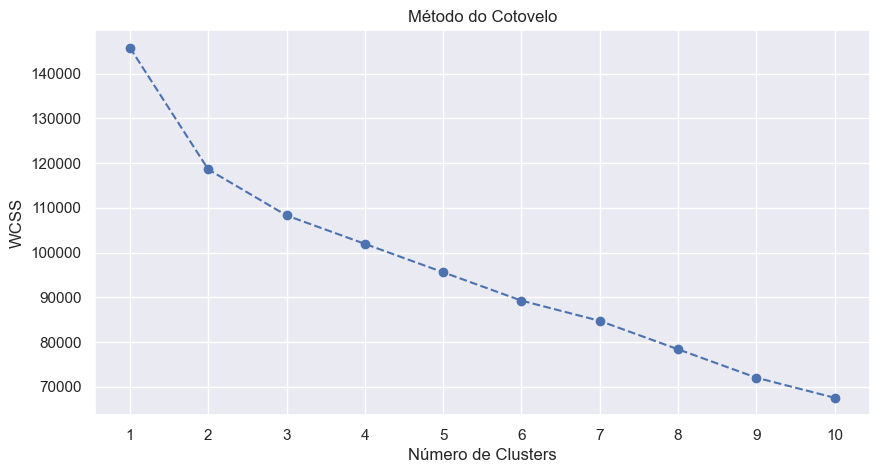

### Gráfico do Método da Silhueta

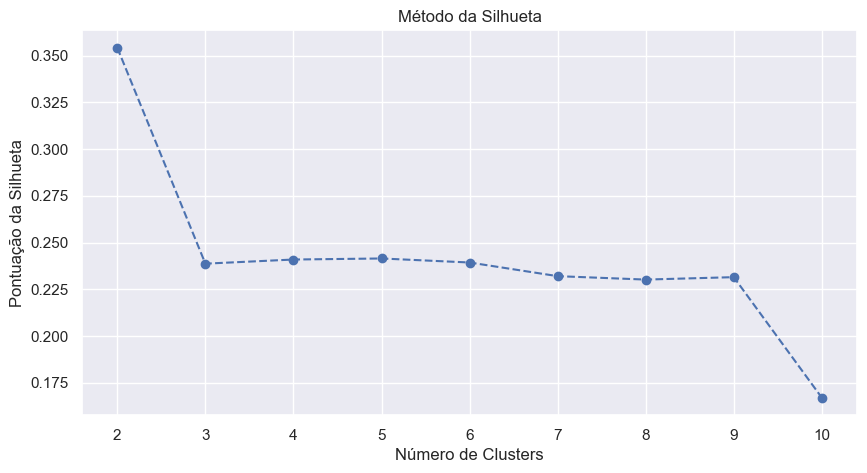


## Explicação dos métodos:

1. **Método do Cotovelo:** O método do cotovelo plota a soma dos quadrados intra-cluster (WCSS) para diferentes números de clusters. O ponto de 'cotovelo' na curva, onde a taxa de diminuição do WCSS diminui drasticamente, é considerado o número ideal de clusters.

2. **Método da Silhueta:** O método da silhueta calcula a pontuação da silhueta para diferentes números de clusters. A pontuação da silhueta mede quão bem cada amostra se encaixa no seu cluster, variando de -1 a 1. Quanto mais próximo de 1, melhor. O número de clusters com a maior pontuação média da silhueta é considerado o ideal.

In [ ]:

def load_and_preprocess_data(file_path):
    try:
        df_treated = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file_path}' não foi encontrado. Verifique se o arquivo está no diretório correto.")
        exit()
    except Exception as e:
        print(f"Erro ao carregar o dataset: {e}")
        exit()
    

    df_treated = pd.get_dummies(df_treated, columns=['color'], prefix='color')
    

    for col in df_treated.columns:
        df_treated[col] = pd.to_numeric(df_treated[col], errors='coerce')
    

    df_treated = df_treated.dropna()
    
    return df_treated

df_treated = load_and_preprocess_data('wines.csv')

# 2. Preparar os Dados para Clusterização

X = df_treated.drop('quality', axis=1)

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar K-means e Validar os Resultados


n_clusters = len(df_treated['quality'].unique())
display(Markdown(f"**Número de clusters (qualidades únicas):** {n_clusters}"))

# Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_treated['cluster'] = kmeans.fit_predict(X_scaled)

display(Markdown("\n**Contagem de amostras por cluster:**"))
cluster_counts = df_treated['cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    display(Markdown(f"Cluster {cluster}: {count}"))

# 4. Método do Cotovelo

def plot_elbow_method(X_scaled, max_clusters=10):

    wcss = []  
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    display(Markdown("### Gráfico do Método do Cotovelo"))
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()
    

plot_elbow_method(X_scaled)

# 5. Método da Silhueta

def plot_silhouette_method(X_scaled, max_clusters=10):

    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    display(Markdown("### Gráfico do Método da Silhueta"))
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Método da Silhueta')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Pontuação da Silhueta')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
    plt.show()
    

plot_silhouette_method(X_scaled)

# Explicações dos Métodos

display(Markdown("\n## Explicação dos métodos:"))
display(Markdown("1. **Método do Cotovelo:** O método do cotovelo plota a soma dos quadrados intra-cluster (WCSS) para diferentes números de clusters. O ponto de 'cotovelo' na curva, onde a taxa de diminuição do WCSS diminui drasticamente, é considerado o número ideal de clusters."))
display(Markdown("2. **Método da Silhueta:** O método da silhueta calcula a pontuação da silhueta para diferentes números de clusters. A pontuação da silhueta mede quão bem cada amostra se encaixa no seu cluster, variando de -1 a 1. Quanto mais próximo de 1, melhor. O número de clusters com a maior pontuação média da silhueta é considerado o ideal."))


**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes. 

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores. 

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão. 

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest. 

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**

In [ ]:

try:
    df_logs = pd.read_excel('logs_firewall.xlsx')
except FileNotFoundError:
    print("Erro: O arquivo 'logs_firewall.xlsx' não foi encontrado. Verifique se o arquivo está no diretório correto.")
    exit()
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    exit()

# 2. Pré-processamento dos Dados
df_logs.columns = ['H', 'M', 'S', 'Nome', 'Maquina', 'IP']

# Converter as colunas de tempo para numérico
df_logs['H'] = pd.to_numeric(df_logs['H'], errors='coerce').fillna(0).astype(int)
df_logs['M'] = pd.to_numeric(df_logs['M'], errors='coerce').fillna(0).astype(int)
df_logs['S'] = pd.to_numeric(df_logs['S'], errors='coerce').fillna(0).astype(int)

# Função para calcular o fator de risco com base no horário
def calcular_fator_de_risco(hora):
    random.seed(64) 
    if 9 <= hora < 12:
        return random.uniform(0, 0.10)
    elif 12 <= hora < 14:
        return random.uniform(0.05, 0.10)
    elif 14 <= hora < 19:
        return random.uniform(0, 0.10)
    elif 19 <= hora < 21:
        return random.uniform(0.20, 0.30)
    elif 21 <= hora < 23:
        return random.uniform(0.40, 0.50)
    elif 0 <= hora < 2:
        return random.uniform(0.60, 0.80)
    elif 2 <= hora < 6:
        return random.uniform(0.80, 1.00)
    elif 6 <= hora < 9:
        return random.uniform(0.30, 0.40)
    else:
        return 0  


df_logs['Risco'] = df_logs['H'].apply(calcular_fator_de_risco)

# 3. Modelagem com Isolation Forest
model = IsolationForest(n_estimators=100, random_state=42, contamination='auto')
model.fit(df_logs[['H', 'M', 'S', 'Risco']])

# Detectar outliers
df_logs['Outlier'] = model.predict(df_logs[['H', 'M', 'S', 'Risco']])

# 4. Análise dos Resultados

outliers = df_logs[df_logs['Outlier'] == -1]

# Criar um DataFrame com as informações dos outliers
outliers_table = outliers[['Nome', 'Maquina', 'IP', 'H', 'M', 'S', 'Risco']].copy()

# Formatar a coluna 'Risco' para exibir com duas casas decimais
outliers_table['Risco'] = outliers_table['Risco'].map('{:.2f}'.format)


display(Markdown("## Possíveis responsáveis pelo ataque (outliers):"))
display(outliers_table)

culpado = outliers['Nome'].value_counts().idxmax()
display(Markdown(f"\n## O responsável mais provável pelo ataque é: {culpado}"))


## Possíveis responsáveis pelo ataque (outliers):

,Nome,Maquina,IP,H,M,S,Risco
6,mutley@empresax.COM.BR,HYPERV$,192.168.102.221,22,52,4,0.45
7,theteacher@empresax.COM.BR,empresaxLAB02$,192.168.100.57,19,14,5,0.25
13,hanskelsen@empresax.COM.BR,empresaxWKS05$,192.168.100.59,13,55,5,0.07
26,jinx@empresax.COM.BR,empresaxLAB03$,192.168.100.60,20,3,3,0.25
31,mutley@empresax.COM.BR,HYPERV$,192.168.102.221,2,37,2,0.90
...,...,...,...,...,...,...,...
1053,hanskelsen@empresax.COM.BR,HYPERV$,192.168.100.64,5,22,3,0.90
1062,hanskelsen@empresax.COM.BR,HYPERV$,192.168.100.64,22,34,3,0.45
1072,hanskelsen@empresax.COM.BR,HYPERV$,192.168.100.64,22,34,3,0.45
1079,hanskelsen@empresax.COM.BR,HYPERV$,192.168.100.64,0,44,4,0.70



## O responsável mais provável pelo ataque é: hanskelsen@empresax.COM.BR